In [279]:
# importing necessary libraries

import pandas as pd
import numpy as np
import missingno as mn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [280]:
# adjust jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Problem Statement:

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

Data Dictionary

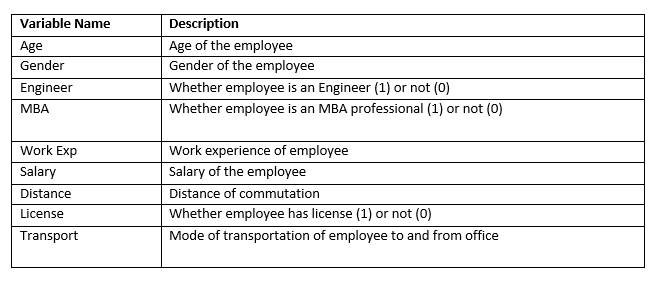

### Data Ingestion

1.Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [281]:
df_emp = pd.read_csv('Transport.csv')
print(df_emp.head(),'\n')
print(df_emp.tail())

   Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license         Transport
0   28    Male         0    0         4    14.3       3.2        0  Public Transport
1   23  Female         1    0         4     8.3       3.3        0  Public Transport
2   29    Male         1    0         7    13.4       4.1        0  Public Transport
3   28  Female         1    1         5    13.4       4.5        0  Public Transport
4   27    Male         1    0         4    13.4       4.6        0  Public Transport 

     Age Gender  Engineer  MBA  Work Exp  Salary  Distance  license          Transport
439   40   Male         1    0        20    57.0      21.4        1  Private Transport
440   38   Male         1    0        19    44.0      21.5        1  Private Transport
441   37   Male         1    0        19    45.0      21.5        1  Private Transport
442   37   Male         0    0        19    47.0      22.8        1  Private Transport
443   39   Male         1    1        21    50.0     

In [282]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [283]:
# Columns renamed for more readability
df_emp.rename(columns = {'Work Exp': 'WorkExp', 'license':'License'}, inplace = True)
df_emp.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Transport'], dtype='object')

Text(0.5, 1.0, 'Figure 1: A matrix visualization of nullity of Transport dataset \n')

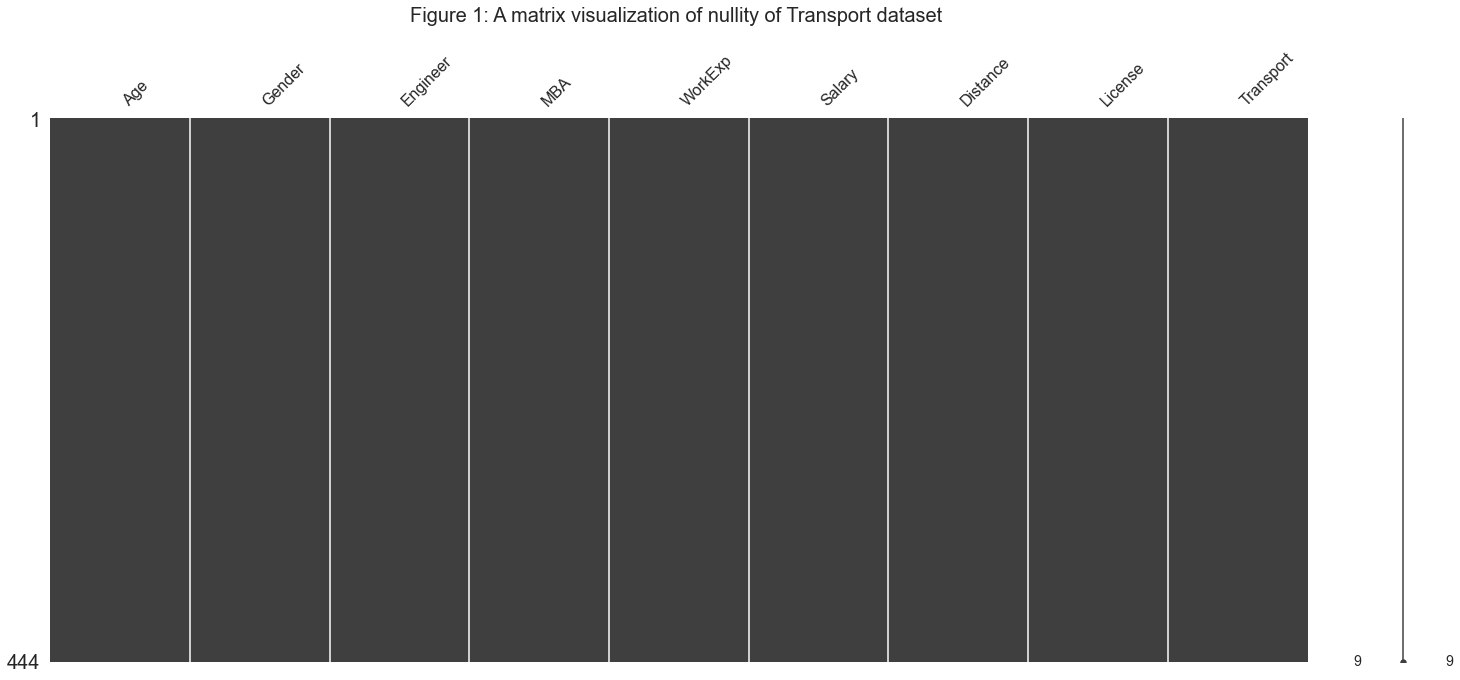

In [284]:
mn.matrix(df_emp)
plt.title('Figure 1: A matrix visualization of nullity of Transport dataset \n', fontsize = 20)

In [285]:
print('Dataset has', df_emp.shape[0], 'rows and', df_emp.shape[1], 'columns')

Dataset has 444 rows and 9 columns


In [286]:
print('Number of duplicate records :',df_emp.duplicated().sum())

Number of duplicate records : 0


In [287]:
# Statistical summary
df_emp.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
WorkExp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
License,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
df_emp.skew()

Age         0.955276
Engineer   -1.186708
MBA         1.144763
WorkExp     1.352840
Salary      2.044533
Distance    0.539851
License     1.259293
dtype: float64

In [289]:
# Splitting numerical and categorical columns for ease of analysis

df_num = df_emp.select_dtypes(include = ['int64', 'float64'])
df_cat = df_emp.select_dtypes(include = 'object')

In [290]:
df_emp.Gender.value_counts(1)

Male      0.711712
Female    0.288288
Name: Gender, dtype: float64

In [512]:
df_emp.Transport.value_counts(1)

AttributeError: 'DataFrame' object has no attribute 'Transport'

In [292]:
print('Table 1: Gender vs Transport count \n')
pd.crosstab(df_emp.Gender, df_emp.Transport, margins = True)

Table 1: Gender vs Transport count 



Transport,Private Transport,Public Transport,All
Gender,,,
Female,51,77,128
Male,93,223,316
All,144,300,444


In [293]:
print('Table 2: Gender vs License count \n')
pd.crosstab(df_emp.Gender, df_emp.License, margins = True)

Table 2: Gender vs License count 



License,0,1,All
Gender,,,
Female,118,10,128
Male,222,94,316
All,340,104,444


In [294]:
print('Table 3: Pivot on Gender having license but rely on Public Transport \n')
pd.pivot_table(data = df_emp, values = 'License', index = 'Gender', columns = 'Transport', aggfunc = np.count_nonzero, margins = True)

Table 3: Pivot on Gender having license but rely on Public Transport 



Transport,Private Transport,Public Transport,All
Gender,,,
Female,10,0,10
Male,61,33,94
All,71,33,104


In [295]:
# Insights

2.Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

Univariate Analysis - Analysis of each features

In [296]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   WorkExp    444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   License    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [297]:
def univariateanalysis_numeric(column):
    if column not in ['Engineer', 'MBA', 'License']:
        plt.figure()
        print('Distribution of '+ column)
        print('------------------------------------------------------------------------------')
#         sns.distplot(df_num[column], color = 'b')
        sns.distplot(df_num[column], hist = True, kde = True, color = 'darkblue', 
                     hist_kws = {'edgecolor' : 'black'}, kde_kws = {'linewidth' : 3}) 
        plt.show()

Distribution of Age
------------------------------------------------------------------------------


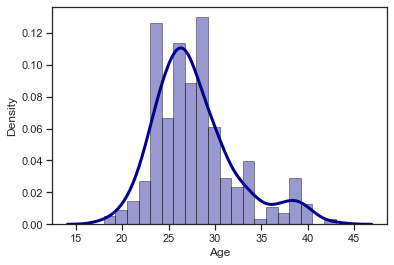

Distribution of WorkExp
------------------------------------------------------------------------------


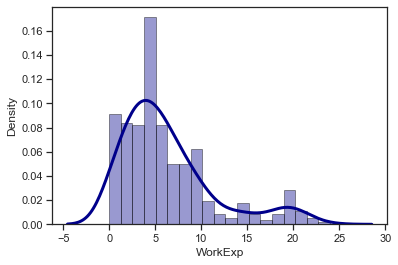

Distribution of Salary
------------------------------------------------------------------------------


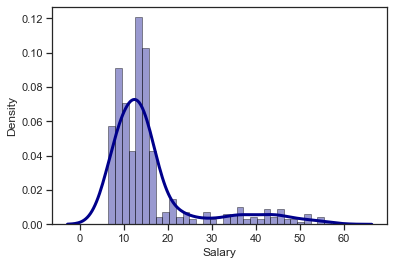

Distribution of Distance
------------------------------------------------------------------------------


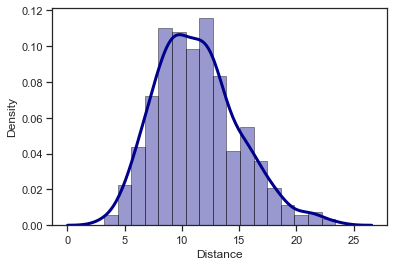

In [298]:
for x in list(df_num.columns.values):
    univariateanalysis_numeric(x)

In [299]:
df_num[['Age','WorkExp','Salary','Distance']].skew().sort_values(ascending = False)

Salary      2.044533
WorkExp     1.352840
Age         0.955276
Distance    0.539851
dtype: float64

In [300]:
# Positively skewed. Insights
# Already encoded variable, boolean

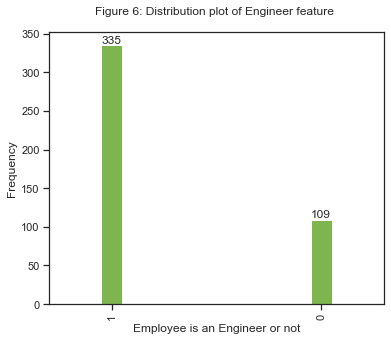

In [301]:
plt.figure(figsize = (6, 5))
c = '#7eb54e'
ax = df_emp.Engineer.value_counts().plot(kind = 'bar', color = c, width = 0.1)
ax.bar_label(ax.containers[0])
plt.xlabel('Employee is an Engineer or not')
plt.ylabel('Frequency')
plt.title('Figure 6: Distribution plot of Engineer feature \n')
plt.show()

In [302]:
round(df_emp.Engineer.value_counts(1)*100,2)

1    75.45
0    24.55
Name: Engineer, dtype: float64

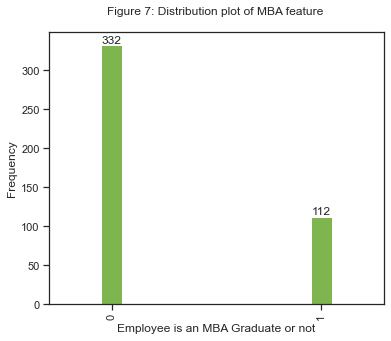

In [303]:
plt.figure(figsize = (6, 5))
c = '#7eb54e'
ax = df_emp.MBA.value_counts().plot(kind = 'bar', width = 0.1, color = c)
ax.bar_label(ax.containers[0])
plt.xlabel('Employee is an MBA Graduate or not')
plt.title('Figure 7: Distribution plot of MBA feature \n')
plt.ylabel('Frequency')
plt.show()

In [304]:
round(df_emp.MBA.value_counts(1)*100, 2)

0    74.77
1    25.23
Name: MBA, dtype: float64

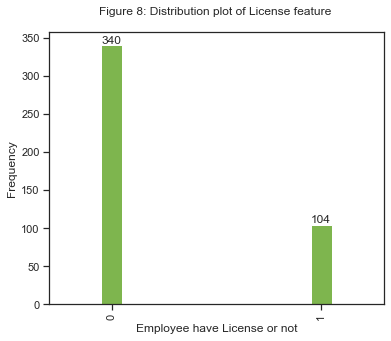

In [305]:
plt.figure(figsize = (6, 5))
c = '#7eb54e'
ax = df_emp.License.value_counts().plot(kind = 'bar', width = 0.1, color = c)
ax.bar_label(ax.containers[0])
plt.title('Figure 8: Distribution plot of License feature \n')
plt.xlabel('Employee have License or not')
plt.ylabel('Frequency')
plt.show()

In [306]:
round(df_emp.License.value_counts(1)*100, 2)

0    76.58
1    23.42
Name: License, dtype: float64

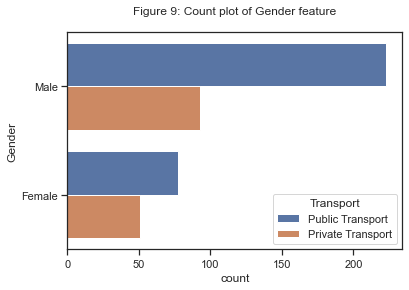

In [307]:
sns.countplot(y = df_emp.Gender, hue = df_emp.Transport)
plt.title('Figure 9: Count plot of Gender feature\n')
plt.show()

In [308]:
# Bivariate Analysis - Analysis of bi variables

In [309]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   WorkExp    444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   License    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


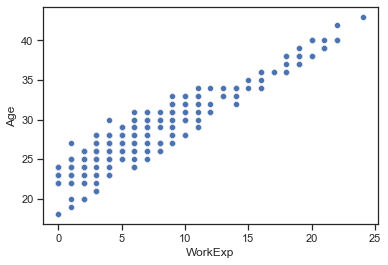

In [310]:
sns.scatterplot(x = df_emp.WorkExp, y = df_emp.Age)
plt.show()

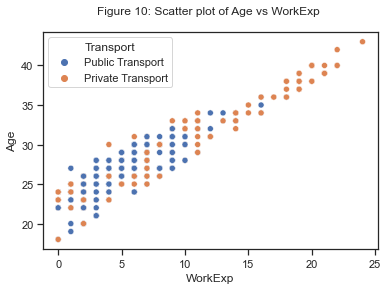

In [311]:
sns.scatterplot(x = df_emp.WorkExp, y = df_emp.Age, hue = df_emp.Transport)
plt.title('Figure 10: Scatter plot of Age vs WorkExp \n')
plt.show()

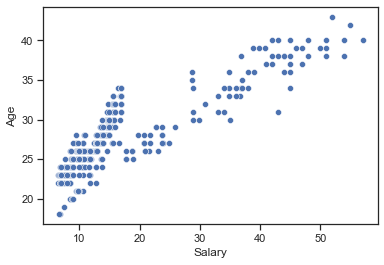

In [312]:
sns.scatterplot(x = df_emp.Salary, y = df_emp.Age)
plt.show()

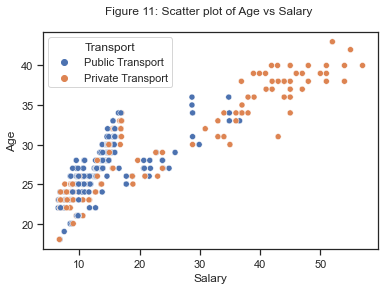

In [313]:
sns.scatterplot(x = df_emp.Salary, y = df_emp.Age, hue = df_emp.Transport)
plt.title('Figure 11: Scatter plot of Age vs Salary \n')
plt.show()

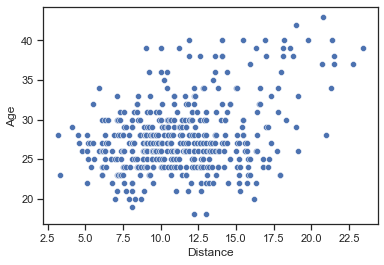

In [314]:
sns.scatterplot(x = df_emp.Distance, y = df_emp.Age)
plt.show()

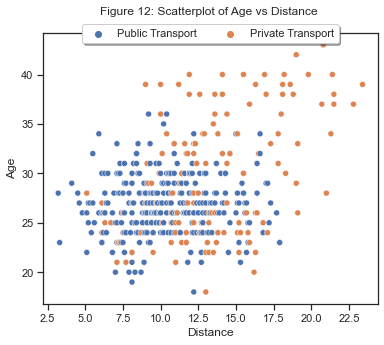

In [315]:
plt.figure(figsize = (6, 5))
ax = sns.scatterplot(x = df_emp.Distance, y = df_emp.Age, hue = df_emp.Transport)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Figure 12: Scatterplot of Age vs Distance \n')
plt.show()

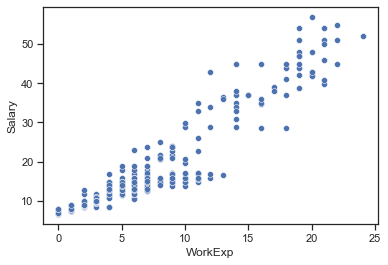

In [316]:
sns.scatterplot(x = df_emp.WorkExp, y = df_emp.Salary)
plt.show()

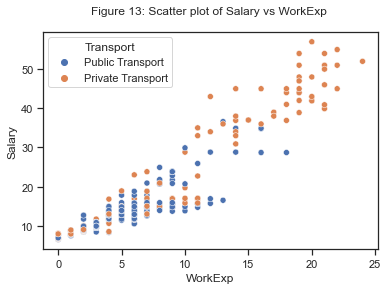

In [317]:
# plt.figure(figsize = (8,7))
sns.scatterplot(x = df_emp.WorkExp, y = df_emp.Salary, hue = df_emp.Transport)
plt.title('Figure 13: Scatter plot of Salary vs WorkExp \n')
plt.show()

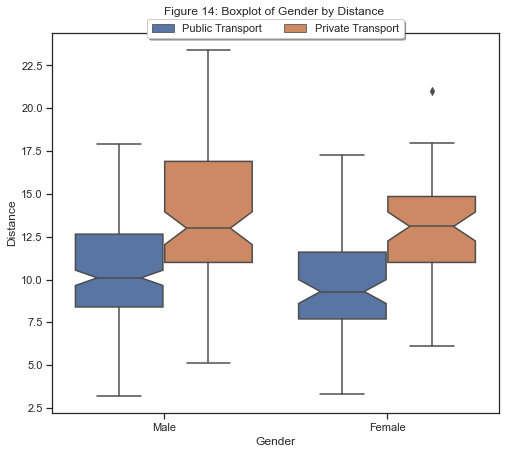

In [318]:
plt.figure(figsize = (8, 7))
ax = sns.boxplot(x = df_emp.Gender, y = df_emp.Distance, hue = df_emp.Transport, notch = True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Figure 14: Boxplot of Gender by Distance \n')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

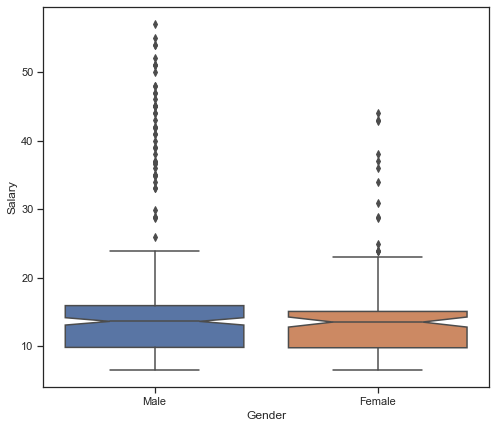

In [319]:
plt.figure(figsize = (8, 7))
sns.boxplot(df_emp.Gender, df_emp.Salary, notch = True)

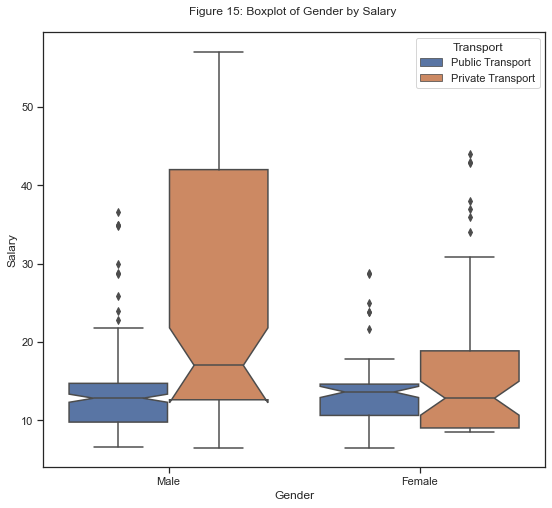

In [320]:
plt.figure(figsize = (9, 8))
sns.boxplot(x = df_emp.Gender, y = df_emp.Salary, hue = df_emp.Transport, notch = True)
plt.title('Figure 15: Boxplot of Gender by Salary \n')
plt.show()

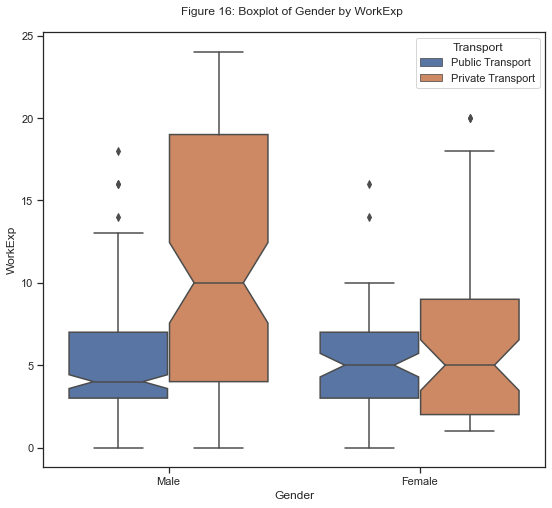

In [321]:
plt.figure(figsize = (9, 8))
sns.boxplot(x = df_emp.Gender, y = df_emp.WorkExp, hue = df_emp.Transport, notch = True)
plt.title('Figure 16: Boxplot of Gender by WorkExp \n')
plt.show()

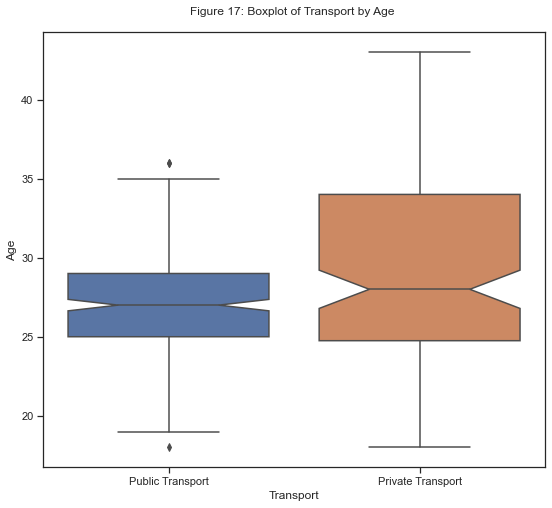

In [322]:
plt.figure(figsize = (9, 8))
sns.boxplot(df_emp.Transport, df_emp.Age, notch = True)
plt.title('Figure 17: Boxplot of Transport by Age \n')
plt.show()

In [323]:
df_colforpairplot = df_emp[['Age', 'WorkExp', 'Salary', 'Distance', 'Transport']]

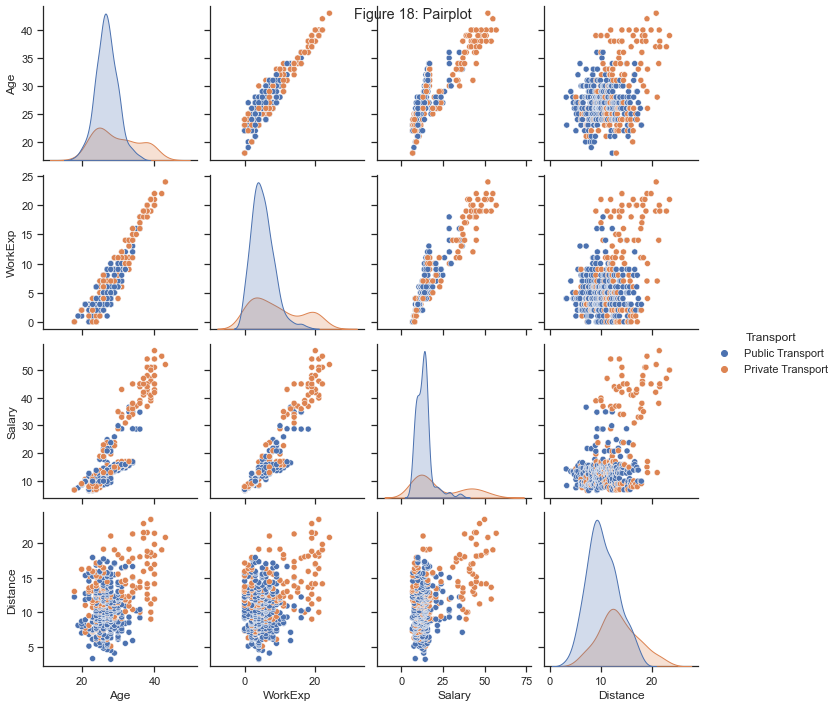

In [324]:
sns.set(style = 'ticks', color_codes = True)
sns.pairplot(df_colforpairplot, hue = 'Transport')
plt.suptitle('Figure 18: Pairplot \n\n\n')
plt.show()

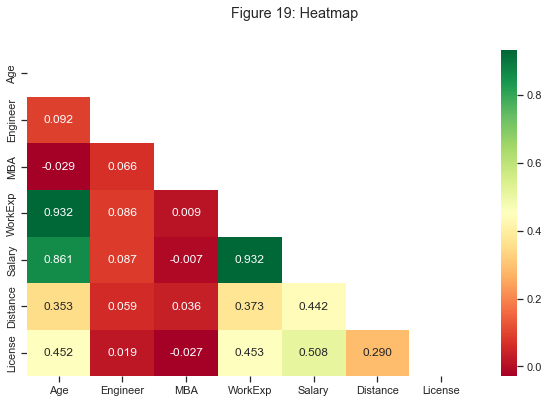

In [325]:
# Multivariate Analysis
plt.figure(figsize=(10,6))
corr = df_emp.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt='0.3f', cmap='RdYlGn', mask=mask);
plt.suptitle('Figure 19: Heatmap \n');

Outlier Analysis

In [326]:
df_colforboxplot = df_num[['Age', 'WorkExp', 'Salary', 'Distance']]
# df_num.info()

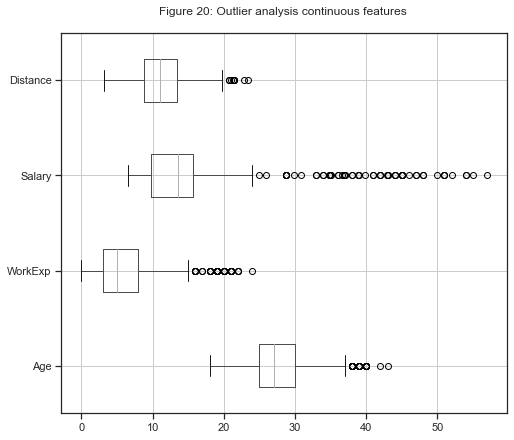

In [327]:
plt.figure(figsize = (8, 7))
df_colforboxplot.boxplot(vert = 0)
plt.title('Figure 20: Outlier analysis continuous features \n')
plt.show()

In [328]:
# Percentage of outliers present in the dataset

Q1 = df_colforboxplot.quantile(0.25)
Q3 = df_colforboxplot.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_colforboxplot < (Q1 - 1.5 * IQR)) | (df_colforboxplot > (Q3 + 1.5 * IQR))).sum()/df_colforboxplot.shape[0]*100).round(2), 
                    columns = ['Outliers %']).sort_values(by = 'Outliers %', ascending = False)

,Outliers %
Salary,13.29
WorkExp,8.56
Age,5.63
Distance,2.03


In [329]:
# KNN and Ensemble methods are not impacted much by the outliers. For checking the performance of model creating a new dataset with outlier treated variables
# Statistical summary to check any out of the box values
df_colforboxplot.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
WorkExp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4


In [330]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [331]:
# Outlier 
df_empot = df_emp.copy()

In [332]:
for col in df_colforboxplot:
    lr, ur = remove_outlier(df_empot[col])
    df_empot[col] = np.where(df_empot[col] > ur, ur, df_empot[col])
    df_empot[col] = np.where(df_empot[col] < lr, lr, df_empot[col])

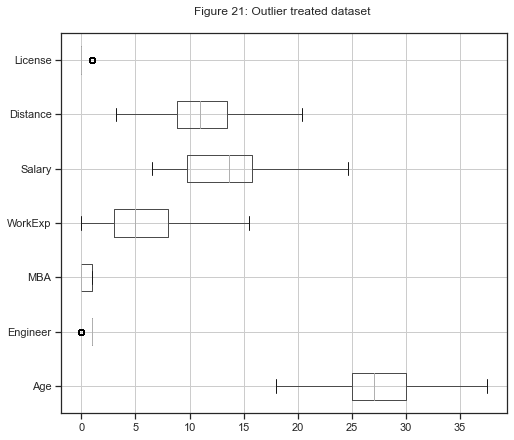

In [333]:
# Boxplot after outlier treatment
plt.figure(figsize = (8, 7))
df_empot.boxplot(vert = 0)
plt.title('Figure 21: Outlier treated dataset \n')
plt.show()

In [334]:
round(df_emp.Transport.value_counts(1)*100, 2)

Public Transport     67.57
Private Transport    32.43
Name: Transport, dtype: float64

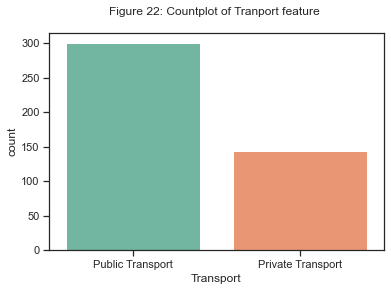

In [335]:
# No issue of class imbalance. Have reasonable proportion in both the class

sns.countplot(df_emp.Transport, palette = 'Set2')
plt.title('Figure 22: Countplot of Tranport feature \n')
plt.show()

### Data Preparation

1.Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [336]:
for column in df_emp.select_dtypes('object'):
    print(df_emp[column].value_counts())

Male      316
Female    128
Name: Gender, dtype: int64
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64


In [337]:
df_emp = pd.get_dummies(df_emp, drop_first = True)

In [338]:
print(df_emp.Gender_Male.value_counts())
print(df_emp['Transport_Public Transport'].value_counts())

1    316
0    128
Name: Gender_Male, dtype: int64
1    300
0    144
Name: Transport_Public Transport, dtype: int64


In [339]:
# Outlier treated dataset -- encoded
df_empot = pd.get_dummies(df_empot, drop_first = True)

In [340]:
df_emp.columns = [c.replace(' ', '_') for c in df_emp.columns]
df_empot.columns = [c.replace(' ', '_') for c in df_empot.columns]

Scaling required for distance based algorithm, KNN. Ensemble methods and Decision trees do no require feature scaling to be performed as they are not sensitive to the variance in the data. Ensemble methods are expected to perform better for classification problem due to its decision tree based logic and its ability to learn from weak learners.

In [341]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         444 non-null    int64  
 1   Engineer                    444 non-null    int64  
 2   MBA                         444 non-null    int64  
 3   WorkExp                     444 non-null    int64  
 4   Salary                      444 non-null    float64
 5   Distance                    444 non-null    float64
 6   License                     444 non-null    int64  
 7   Gender_Male                 444 non-null    uint8  
 8   Transport_Public_Transport  444 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 25.3 KB


Data cleansing done. Datatype changed to continuous. Can be proceeded for model building

In [342]:
# df_emp = pd.read_csv('Transport.csv')
# df_emp.rename(columns = {'Work Exp': 'WorkExp', 'license':'License'}, inplace = True)
# df_emp = pd.get_dummies(df_emp, drop_first = True)
# df_emp.columns = [c.replace(' ', '_') for c in df_emp.columns]

In [343]:
df_emp.columns

Index(['Age', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Gender_Male', 'Transport_Public_Transport'], dtype='object')

In [344]:
df_emp_copy = df_emp.copy()
# df_emp_copy.columns

In [345]:
# Data split -- Extract the target column into separate vectors for training set and testing set

X = df_emp.drop('Transport_Public_Transport', axis = 1)
y = df_emp.pop('Transport_Public_Transport')

In [346]:
df_emp['Transport_Public_Transport'] = df_emp_copy['Transport_Public_Transport']
df_emp.columns

Index(['Age', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Gender_Male', 'Transport_Public_Transport'], dtype='object')

In [347]:
print(X.shape)
print(y.shape)

(444, 8)
(444,)


In [348]:
# Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7, 
                                                    stratify =  df_emp['Transport_Public_Transport'])
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (310, 8)
Shape of X_test (134, 8)
Shape of y_train (310,)
Shape of y_test (134,)


### Modeling

1.Apply Logistic Regression

In [205]:
# applying statsmodel building to get an idea of the feature significance, summary statistics

In [349]:
import statsmodels.formula.api as sm

In [350]:
df_emp.columns

Index(['Age', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Gender_Male', 'Transport_Public_Transport'], dtype='object')

In [351]:
formula_1 = 'Transport_Public_Transport~Age+Engineer+MBA+WorkExp+Salary+Distance+License+Gender_Male'
logistic_1 = sm.logit(formula = formula_1, data = df_emp).fit()

Optimization terminated successfully.
         Current function value: 0.437944
         Iterations 7


In [352]:
logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Transport_Public_Transport   No. Observations:                  444
Model:                                  Logit   Df Residuals:                      435
Method:                                   MLE   Df Model:                            8
Date:                        Sat, 29 Oct 2022   Pseudo R-squ.:                  0.3049
Time:                                20:03:12   Log-Likelihood:                -194.45
converged:                               True   LL-Null:                       -279.76
Covariance Type:                    nonrobust   LLR p-value:                 9.551e-33
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8340      1.788     -0.466      0.641      -4.339       2.671
Age             0.2083      0.077      2.706      0.007       0.057       0.359
Engineer       -0.1543      0.296     -0.521      0.603      -0.735       0.427
MBA             0.5601      0.314      1.782      0.075      -0.056       1.176
WorkExp        -0.1005      0.100     -1.001      0.317      -0.297       0.096
Salary         -0.0805      0.040     -2.003      0.045      -0.159      -0.002
Distance       -0.2248      0.043     -5.290      0.000      -0.308      -0.142
License        -2.0463      0.334     -6.135      0.000      -2.700      -1.393
Gender_Male     1.2810      0.288      4.441      0.000       0.716       1.846
===============================================================================
"""

In [353]:
print('The adjusted pseudo R-square value is', 1 - ((logistic_1.llf - logistic_1.df_model) / logistic_1.llnull))

The adjusted pseudo R-square value is 0.2763497855269711


In [354]:
# Variance Inflation Factor
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [355]:
vif_cal(input_data = df_emp.drop('Transport_Public_Transport',axis=1))
# cutoff value 2

Age  VIF =  7.89
Engineer  VIF =  1.02
MBA  VIF =  1.03
WorkExp  VIF =  15.74
Salary  VIF =  8.87
Distance  VIF =  1.28
License  VIF =  1.45
Gender_Male  VIF =  1.07


In [356]:
# Model 2 - dropping WorkExp

formula_2 = 'Transport_Public_Transport~Age+Engineer+MBA+Salary+Distance+License+Gender_Male'
logistic_2 = sm.logit(formula = formula_2, data = df_emp).fit()

Optimization terminated successfully.
         Current function value: 0.439069
         Iterations 7


In [357]:
logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Transport_Public_Transport   No. Observations:                  444
Model:                                  Logit   Df Residuals:                      436
Method:                                   MLE   Df Model:                            7
Date:                        Sat, 29 Oct 2022   Pseudo R-squ.:                  0.3032
Time:                                20:03:45   Log-Likelihood:                -194.95
converged:                               True   LL-Null:                       -279.76
Covariance Type:                    nonrobust   LLR p-value:                 3.014e-33
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3889      1.317      0.295      0.768      -2.193       2.971
Age             0.1561      0.057      2.749      0.006       0.045       0.267
Engineer       -0.1459      0.295     -0.494      0.622      -0.725       0.433
MBA             0.5265      0.311      1.690      0.091      -0.084       1.137
Salary         -0.1107      0.028     -4.000      0.000      -0.165      -0.056
Distance       -0.2193      0.042     -5.222      0.000      -0.302      -0.137
License        -2.0088      0.330     -6.089      0.000      -2.655      -1.362
Gender_Male     1.2805      0.287      4.454      0.000       0.717       1.844
===============================================================================
"""

In [358]:
print('The adjusted pseudo R-square value is', 1 - ((logistic_2.llf - logistic_2.df_model) / logistic_2.llnull))

The adjusted pseudo R-square value is 0.27813885793680604


In [359]:
vif_cal(input_data=df_emp.drop(['Transport_Public_Transport','WorkExp'],axis=1))

Age  VIF =  3.89
Engineer  VIF =  1.02
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
License  VIF =  1.43
Gender_Male  VIF =  1.07


In [360]:
# Model 3 - Dropping Engineer variable

formula_3 = 'Transport_Public_Transport~Age+MBA+Salary+Distance+License+Gender_Male'
logistic_3 = sm.logit(formula = formula_3, data = df_emp).fit()

Optimization terminated successfully.
         Current function value: 0.439346
         Iterations 7


In [361]:
logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Transport_Public_Transport   No. Observations:                  444
Model:                                  Logit   Df Residuals:                      437
Method:                                   MLE   Df Model:                            6
Date:                        Sat, 29 Oct 2022   Pseudo R-squ.:                  0.3027
Time:                                20:04:03   Log-Likelihood:                -195.07
converged:                               True   LL-Null:                       -279.76
Covariance Type:                    nonrobust   LLR p-value:                 6.095e-34
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3196      1.310      0.244      0.807      -2.248       2.887
Age             0.1547      0.057      2.730      0.006       0.044       0.266
MBA             0.5115      0.309      1.653      0.098      -0.095       1.118
Salary         -0.1105      0.028     -4.001      0.000      -0.165      -0.056
Distance       -0.2192      0.042     -5.217      0.000      -0.302      -0.137
License        -2.0004      0.329     -6.077      0.000      -2.646      -1.355
Gender_Male     1.2758      0.287      4.446      0.000       0.713       1.838
===============================================================================
"""

In [362]:
print('The adjusted pseudo R-square value is', 1 - ((logistic_3.llf - logistic_3.df_model) / logistic_3.llnull))

The adjusted pseudo R-square value is 0.28127429711690444


In [363]:
vif_cal(input_data=df_emp.drop(['Transport_Public_Transport','WorkExp','Engineer'],axis=1))

Age  VIF =  3.89
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
License  VIF =  1.43
Gender_Male  VIF =  1.07


In [364]:
# Model 4 - dropping MBA feature

formula_4 = 'Transport_Public_Transport~Age+Salary+Distance+License+Gender_Male'
logistic_4 = sm.logit(formula = formula_4, data = df_emp).fit()

Optimization terminated successfully.
         Current function value: 0.442539
         Iterations 6


In [365]:
logistic_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Transport_Public_Transport   No. Observations:                  444
Model:                                  Logit   Df Residuals:                      438
Method:                                   MLE   Df Model:                            5
Date:                        Sat, 29 Oct 2022   Pseudo R-squ.:                  0.2977
Time:                                20:04:19   Log-Likelihood:                -196.49
converged:                               True   LL-Null:                       -279.76
Covariance Type:                    nonrobust   LLR p-value:                 3.988e-34
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5268      1.297      0.406      0.685      -2.016       3.069
Age             0.1478      0.056      2.636      0.008       0.038       0.258
Salary         -0.1060      0.027     -3.917      0.000      -0.159      -0.053
Distance       -0.2190      0.042     -5.197      0.000      -0.302      -0.136
License        -2.0216      0.329     -6.138      0.000      -2.667      -1.376
Gender_Male     1.3271      0.285      4.650      0.000       0.768       1.886
===============================================================================
"""

In [366]:
print('The adjusted pseudo R-square value is', 1 - ((logistic_4.llf - logistic_4.df_model) / logistic_4.llnull))

The adjusted pseudo R-square value is 0.27978052508744866


In [367]:
vif_cal(input_data=df_emp.drop(['Transport_Public_Transport','WorkExp','Engineer','MBA'],axis=1))

Age  VIF =  3.88
Salary  VIF =  4.45
Distance  VIF =  1.26
License  VIF =  1.43
Gender_Male  VIF =  1.06


In [368]:
# Model 5 - Removing Age feature

formula_5 = 'Transport_Public_Transport~Salary+Distance+License+Gender_Male'
logistic_5 = sm.logit(formula = formula_5, data = df_emp).fit()

Optimization terminated successfully.
         Current function value: 0.450574
         Iterations 6


In [369]:
logistic_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Transport_Public_Transport   No. Observations:                  444
Model:                                  Logit   Df Residuals:                      439
Method:                                   MLE   Df Model:                            4
Date:                        Sat, 29 Oct 2022   Pseudo R-squ.:                  0.2849
Time:                                20:04:35   Log-Likelihood:                -200.05
converged:                               True   LL-Null:                       -279.76
Covariance Type:                    nonrobust   LLR p-value:                 1.960e-33
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7098      0.526      7.059      0.000       2.680       4.740
Salary         -0.0501      0.016     -3.149      0.002      -0.081      -0.019
Distance       -0.2199      0.042     -5.288      0.000      -0.301      -0.138
License        -1.9231      0.323     -5.945      0.000      -2.557      -1.289
Gender_Male     1.3261      0.283      4.690      0.000       0.772       1.880
===============================================================================
"""

In [370]:
print('The adjusted pseudo R-square value is', 1 - ((logistic_5.llf - logistic_5.df_model) / logistic_5.llnull))

The adjusted pseudo R-square value is 0.2706024347148349


In [371]:
vif_cal(input_data=df_emp.drop(['Transport_Public_Transport','WorkExp','Engineer','MBA','Age'],axis=1))

Salary  VIF =  1.55
Distance  VIF =  1.25
License  VIF =  1.42
Gender_Male  VIF =  1.06


In [229]:
# model 3/model 4 can be finalized. pseudo r square value dropping

In [372]:
from sklearn.linear_model import LogisticRegression

In [373]:
y_train.value_counts(1)

1    0.674194
0    0.325806
Name: Transport_Public_Transport, dtype: float64

In [374]:
y_test.value_counts(1)

1    0.679104
0    0.320896
Name: Transport_Public_Transport, dtype: float64

In [375]:
df_emp.Transport_Public_Transport.value_counts(1)

1    0.675676
0    0.324324
Name: Transport_Public_Transport, dtype: float64

In [376]:
LR = LogisticRegression(solver = 'newton-cg',penalty = 'none' )

In [377]:
X_train.columns

Index(['Age', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Gender_Male'], dtype='object')

In [378]:
# model 1 - base
model_1_train = LR.fit(X_train, y_train)
lr_score_model1_train = model_1_train.score(X_train, y_train)
print('Train accuracy :', model_1_train.score(X_train, y_train))

Train accuracy : 0.8032258064516129


In [379]:
model_1_test = LR.fit(X_test, y_test)
lr_score_model1_test = model_1_test.score(X_train, y_train)
print('Test accuracy :',model_1_test.score(X_test, y_test))

Test accuracy : 0.835820895522388


In [238]:
# Underfit
# GridsearchCV with different solvers

In [380]:
# model 2 - dropping WorkExp
model_2_train = LR.fit(X_train[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_train)
lr_score_model2_train = model_2_train.score(X_train[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_train)
print('Train accuracy :', model_2_train.score(X_train[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_train))

Train accuracy : 0.8032258064516129


In [381]:
model_2_test = LR.fit(X_test[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_test)
lr_score_model2_test = model_2_test.score(X_test[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_test)
print('Test accuracy :', model_2_test.score(X_test[['Age','Engineer','MBA','Salary','Distance','License','Gender_Male']], y_test))

Test accuracy : 0.8134328358208955


In [241]:
# Underfit

In [382]:
# model 3 - dropping Engineer
model_3_train = LR.fit(X_train[['Age','MBA','Salary','Distance','License','Gender_Male']], y_train)
lr_score_model3_train = model_3_train.score(X_train[['Age','MBA','Salary','Distance','License','Gender_Male']], y_train)
print('Train accuracy :', model_3_train.score(X_train[['Age','MBA','Salary','Distance','License','Gender_Male']], y_train))

Train accuracy : 0.8032258064516129


In [383]:
model_3_test = LR.fit(X_test[['Age','MBA','Salary','Distance','License','Gender_Male']], y_test)
lr_score_model3_test = model_3_test.score(X_test[['Age','MBA','Salary','Distance','License','Gender_Male']], y_test)
print('Test accuracy :', model_3_test.score(X_test[['Age','MBA','Salary','Distance','License','Gender_Male']], y_test))

Test accuracy : 0.8283582089552238


In [244]:
# Underfit

In [384]:
# model 4 - dropping MBA
model_4_train = LR.fit(X_train[['Age','Salary','Distance','License','Gender_Male']], y_train)
lr_score_model4_train = model_4_train.score(X_train[['Age','Salary','Distance','License','Gender_Male']], y_train)
print('Train accuracy :', model_4_train.score(X_train[['Age','Salary','Distance','License','Gender_Male']], y_train))

Train accuracy : 0.8032258064516129


In [385]:
model_4_test = LR.fit(X_test[['Age','Salary','Distance','License','Gender_Male']], y_test)
lr_score_model4_test = model_4_test.score(X_test[['Age','Salary','Distance','License','Gender_Male']], y_test)
print('Test accuracy :', model_4_test.score(X_test[['Age','Salary','Distance','License','Gender_Male']], y_test))

Test accuracy : 0.8208955223880597


In [247]:
# Underfit

In [386]:
# model 5 - dropping Age
model_5_train = LR.fit(X_train[['Salary','Distance','License','Gender_Male']], y_train)
lr_score_model5_train = model_5_train.score(X_train[['Salary','Distance','License','Gender_Male']], y_train)
print('Train accuracy :', model_5_train.score(X_train[['Salary','Distance','License','Gender_Male']], y_train))

Train accuracy : 0.8193548387096774


In [387]:
model_5_test = LR.fit(X_test[['Salary','Distance','License','Gender_Male']], y_test)
lr_score_model5_test = model_5_test.score(X_test[['Salary','Distance','License','Gender_Male']], y_test)
print('Test accuracy :', model_5_test.score(X_test[['Salary','Distance','License','Gender_Male']], y_test))

Test accuracy : 0.8432835820895522


In [388]:
# model 6 - dropping Salary
model_6_train = LR.fit(X_train[['Distance','License','Gender_Male']], y_train)
lr_score_model6_train = model_6_train.score(X_train[['Distance','License','Gender_Male']], y_train)
print('Train accuracy :', model_6_train.score(X_train[['Distance','License','Gender_Male']], y_train))

Train accuracy : 0.8161290322580645


In [389]:
model_6_test = LR.fit(X_test[['Distance','License','Gender_Male']], y_test)
lr_score_model6_test = model_6_test.score(X_test[['Distance','License','Gender_Male']], y_test)
print('Test accuracy :', model_6_test.score(X_test[['Distance','License','Gender_Male']], y_test))

Test accuracy : 0.7985074626865671


In [390]:
# model 7 - dropping gender feature
model_7_train = LR.fit(X_train[['Distance','License']], y_train)
model_7_train.score(X_train[['Distance','License']], y_train)

0.7709677419354839

In [391]:
model_7_test = LR.fit(X_test[['Distance','License']], y_test)
model_7_test.score(X_test[['Distance','License']], y_test)

0.8134328358208955

In [254]:
# Removing Gender gives an overfit model. Model 6 is able to give an overall better prediction on both Train and Test set compared to other models

In [255]:
# GridsearchCV - Model tuning
# from sklearn.model_selection import GridSearchCV
# grid_param = {
#                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#             }

In [256]:
# gr_LR = GridSearchCV(LogisticRegression(), param_grid = grid_param, refit = True, cv = 5)

In [257]:
# gr_LR.fit(X_train, y_train)

In [258]:
# gr_LR.best_estimator_

In [259]:
# LR = LogisticRegression(solver = 'newton-cg')

In [260]:
# # model 1 - base
# model_1f_train = LR.fit(X_train, y_train)
# print('Training accuracy :', model_1f_train.score(X_train, y_train))
# model_1f_test = LR.fit(X_test, y_test)
# print('Testing accuracy :', model_1f_test.score(X_test, y_test))

In [261]:
# Underfit

In [262]:
# model_6f_train = LR.fit(X_train[['Distance','License','Gender_Male']], y_train)
# lr_score_model6_train_aftertuning = model_6f_train.score(X_train[['Distance','License','Gender_Male']], y_train)
# print('Training accuracy :', model_6f_train.score(X_train[['Distance','License','Gender_Male']], y_train))
# model_6f_test = LR.fit(X_test[['Distance','License','Gender_Male']], y_test)
# lr_score_model6_test_aftertuning = model_6f_test.score(X_test[['Distance','License','Gender_Male']], y_test)
# print('Testing accuracy :', model_6f_test.score(X_test[['Distance','License','Gender_Male']], y_test))

In [392]:
# model tuning using hyperparameters
from sklearn.model_selection import GridSearchCV

grid_param1 = {
                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [5, 10, 15],
                'C' : np.logspace(-4, 4, 20)
            }
gr_LR1 = GridSearchCV(LogisticRegression(), param_grid = grid_param1, refit = True, cv = 5)
gr_LR1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [5, 10, 15],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [393]:
gr_LR1.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=15, solver='newton-cg')

In [394]:
gr_LR1 = LogisticRegression(solver = 'newton-cg', C = 0.23357214690901212, max_iter = 10)

In [395]:
# model 1 - base
model_1f1_train = gr_LR1.fit(X_train, y_train)
print('Training accuracy :', model_1f1_train.score(X_train, y_train))
model_1f1_test = gr_LR1.fit(X_test, y_test)
print('Testing accuracy :', model_1f1_test.score(X_test, y_test))

Training accuracy : 0.8064516129032258
Testing accuracy : 0.8059701492537313


In [396]:
model_1f1_train.n_features_in_

8

In [397]:
model_6f1_train = gr_LR1.fit(X_train[['Distance','License','Gender_Male']], y_train)
lr_score_model6_train_aftertuning = model_6f1_train.score(X_train[['Distance','License','Gender_Male']], y_train)
print('Training accuracy :', model_6f1_train.score(X_train[['Distance','License','Gender_Male']], y_train))
model_6f1_test = gr_LR1.fit(X_test[['Distance','License','Gender_Male']], y_test)
lr_score_model6_test_aftertuning = model_6f1_test.score(X_test[['Distance','License','Gender_Male']], y_test)
print('Testing accuracy :', model_6f1_test.score(X_test[['Distance','License','Gender_Male']], y_test))

Training accuracy : 0.8032258064516129
Testing accuracy : 0.7835820895522388


In [398]:
# Outlier treated dataset. Any impact of outliers

df_empot.columns

Index(['Age', 'Engineer', 'MBA', 'WorkExp', 'Salary', 'Distance', 'License', 'Gender_Male', 'Transport_Public_Transport'], dtype='object')

In [399]:
X_ot = df_empot.drop(['Transport_Public_Transport'], axis = 1)
y_ot = df_empot.pop('Transport_Public_Transport')

In [406]:
X_train_ot, X_test_ot, y_train_ot, y_test_ot = train_test_split(X_ot, y_ot, test_size = 0.3, random_state = 7, stratify = y)

In [407]:
# model 1 - base
model_1ot_train = gr_LR1.fit(X_train_ot, y_train_ot)
print('Training accuracy :', model_1ot_train.score(X_train_ot, y_train_ot))
model_1ot_test = gr_LR1.fit(X_test_ot, y_test_ot)
print('Testing accuracy :', model_1ot_test.score(X_test_ot, y_test_ot))

Training accuracy : 0.8032258064516129
Testing accuracy : 0.8208955223880597


In [408]:
model_6ot_train = gr_LR1.fit(X_train_ot[['Distance','License','Gender_Male']], y_train_ot)
print('Training accuracy :', model_6ot_train.score(X_train_ot[['Distance','License','Gender_Male']], y_train_ot))
model_6ot_test = gr_LR1.fit(X_test_ot[['Distance','License','Gender_Male']], y_test_ot)
print('Testing accuracy :', model_6ot_test.score(X_test_ot[['Distance','License','Gender_Male']], y_test_ot))

Training accuracy : 0.8032258064516129
Testing accuracy : 0.7835820895522388


In [409]:
from sklearn import metrics

In [413]:
model_1_train.fit(X_train, y_train)
model1_pred_train = model_1_train.predict(X_train)
tn, fp, fn, tp = metrics.confusion_matrix(y_train, model1_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

model1_pred_test = model_1_test.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, model1_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

gr_LR1.fit(X_train, y_train)
model_1f1_train = gr_LR1.fit(X_train, y_train)
model1f_pred_train = model_1f1_train.predict(X_train)
tn, fp, fn, tp = metrics.confusion_matrix(y_train, model1f_pred_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

model_lf1_test = gr_LR1.fit(X_test, y_test)
model1f_pred_test = model_1f1_test.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, model1f_pred_test).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

True Negative: 55 
False Positives: 46 
False Negatives: 15 
True Positives: 194 


True Negative: 27 
False Positives: 16 
False Negatives: 9 
True Positives: 82 


True Negative: 53 
False Positives: 48 
False Negatives: 12 
True Positives: 197 


True Negative: 23 
False Positives: 20 
False Negatives: 6 
True Positives: 85 




2.Apply KNN Model. Interpret the results. 

In [414]:
# Scaling is needed since KNN is a distance based algorithm

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [415]:
pd.DataFrame(X_train_scaled, columns = X_train.columns).head()

,Age,Engineer,MBA,WorkExp,Salary,Distance,License,Gender_Male
0,-1.336014,0.545042,-0.584800,-1.253106,-0.884761,0.495944,-0.510061,0.62960
1,0.062402,-1.834720,-0.584800,-0.057222,-0.236152,-0.553306,-0.510061,-1.58831
2,-0.403736,0.545042,-0.584800,-0.455850,-0.312459,-0.083904,-0.510061,-1.58831
3,-1.102945,0.545042,-0.584800,-1.253106,-0.779839,1.241464,-0.510061,0.62960
4,-0.636806,-1.834720,1.709986,-0.455850,-0.417381,0.385497,-0.510061,0.62960


In [416]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Thumbrule of sqrt of n taken for k

In [417]:
knn_score_model1_train = KNN_model.score(X_train_scaled, y_train)
knn_score_model1_test = KNN_model.score(X_test_scaled, y_test)
print('Training accuracy :',KNN_model.score(X_train_scaled, y_train))
print('Testing accuracy :',KNN_model.score(X_test_scaled, y_test))

Training accuracy : 0.6741935483870968
Testing accuracy : 0.6791044776119403


In [418]:
ac_scores_train = []
ac_scores_test = []

In [419]:
for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    
    # Train accuracy
    score1 = knn.score(X_train_scaled, y_train)
    ac_scores_train.append(score1)
    
    # Test accuracy
    score2 = knn.score(X_test_scaled, y_test)
    ac_scores_test.append(score2)

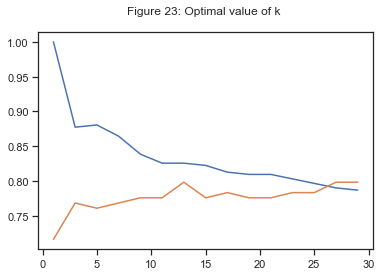

In [421]:
plt.title('Figure 23: Optimal value of k \n')
plt.plot(range(1, 30, 2), ac_scores_train)
plt.plot(range(1, 30, 2), ac_scores_test)
plt.show()

In [422]:
# Lines meet at 26. May give a better accuracy

# KNN_model = KNeighborsClassifier(n_neighbors = 23)
KNN_model1 = KNeighborsClassifier(n_neighbors = 27)
KNN_model1.fit(X_train_scaled, y_train)

print('Training accuracy :', KNN_model.score(X_train_scaled, y_train))
print('Testing accuracy :', KNN_model.score(X_test_scaled, y_test))

Training accuracy : 0.6741935483870968
Testing accuracy : 0.6791044776119403


In [423]:
# Model tuning

param_grid = {
    'n_neighbors' : [21, 23, 25, 26, 27, 28],
    'p' : [1, 2]
}

In [424]:
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv = 5, scoring = 'recall')

In [425]:
gridKNN.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [21, 23, 25, 26, 27, 28], 'p': [1, 2]},
             scoring='recall')

In [426]:
gridKNN.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [427]:

KNN_model2 = KNeighborsClassifier(n_neighbors = 25)
KNN_model2.fit(X_train_scaled, y_train)

knn_score_model2_train = KNN_model2.score(X_train_scaled, y_train)
knn_score_model2_test = KNN_model2.score(X_test_scaled, y_test)

print('Training accuracy :', KNN_model2.score(X_train_scaled, y_train))
print('Testing accuracy :', KNN_model2.score(X_test_scaled, y_test))

Training accuracy : 0.7967741935483871
Testing accuracy : 0.7835820895522388


In [428]:
print('Basic model Train')
knn_model1_predict_train = KNN_model.predict(X_train_scaled)
print(metrics.classification_report(y_train, knn_model1_predict_train))

print('Basic model Test')
knn_model1_predict_test = KNN_model.predict(X_test_scaled)
print(metrics.classification_report(y_test, knn_model1_predict_test))

print('Fine Tuned model Train')
knn_model2_predict_train = KNN_model2.predict(X_train_scaled)
print(metrics.classification_report(y_train, knn_model2_predict_train))

print('Fine Tuned model Test')
knn_model2_predict_test = KNN_model2.predict(X_test_scaled)
print(metrics.classification_report(y_test, knn_model2_predict_test))

Basic model Train
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.67      1.00      0.81       209

    accuracy                           0.67       310
   macro avg       0.34      0.50      0.40       310
weighted avg       0.45      0.67      0.54       310

Basic model Test
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.68      1.00      0.81        91

    accuracy                           0.68       134
   macro avg       0.34      0.50      0.40       134
weighted avg       0.46      0.68      0.55       134

Fine Tuned model Train
              precision    recall  f1-score   support

           0       0.91      0.42      0.57       101
           1       0.78      0.98      0.87       209

    accuracy                           0.80       310
   macro avg       0.84      0.70      0.72       310
weighted avg    

In [ ]:
# KNN works well with small dataset. The major limitation of logistic regression is the assumption of linearity between the dependent and independent variable

3.Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [429]:
# Ensemble method - RandomForest classifier
# Base

from sklearn.ensemble import RandomForestClassifier

rfcl_base = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
rfcl_base.fit(X_train, y_train)

RandomForestClassifier()

In [430]:
print('Training accuracy :', rfcl_base.score(X_train, y_train))
print('Testing accuracy :', rfcl_base.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8059701492537313


In [431]:
X_train.shape

(310, 8)

In [432]:
# Overfit

param_grid = {
            'criterion' : ['gini', 'entropy'],
            'min_samples_leaf' : [10, 11, 12],
            'min_samples_split': [20, 25],
            'max_depth' : [3, 4, 5, 6, 7]
            }

In [433]:
grid_rfcl = GridSearchCV(RandomForestClassifier(random_state =7), param_grid = param_grid, cv = 5)
grid_rfcl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [10, 11, 12],
                         'min_samples_split': [20, 25]})

In [434]:
grid_rfcl.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [435]:
rfcl_reg = RandomForestClassifier(criterion = 'gini', max_depth = 7, min_samples_split = 20, min_samples_leaf = 10)
# rfcl_reg = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 57, min_samples_split = 164)
# rfcl_reg = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 55, min_samples_split = 166)
rfcl_reg.fit(X_train, y_train)
# rfcl_rev.fit(X_train, y_train)

# min_samples_split underfits the model. 

RandomForestClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=20)

In [436]:
rfcl_score_reg_train = rfcl_reg.score(X_train, y_train)
rfcl_score_reg_test = rfcl_reg.score(X_test, y_test)
print('Training accuracy :', rfcl_reg.score(X_train, y_train))
print('Testing accuracy :', rfcl_reg.score(X_test, y_test))

Training accuracy : 0.8483870967741935
Testing accuracy : 0.8059701492537313


In [437]:
print (pd.DataFrame(rfcl_reg.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                  Imp
Salary       0.257507
WorkExp      0.212589
Distance     0.171384
Age          0.130527
License      0.125487
Gender_Male  0.086909
Engineer     0.008629
MBA          0.006969


In [438]:
# BaggingClassifier

from sklearn.ensemble import BaggingClassifier

bgcl_1 = BaggingClassifier(base_estimator = RandomForestClassifier(), random_state = 7)
bgcl_1.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=7)

In [439]:
bgcl_score_model1_train = bgcl_1.score(X_train, y_train)
bgcl_score_model1_test = bgcl_1.score(X_test, y_test)
print('Training accuracy :', bgcl_1.score(X_train, y_train))
print('Testing accuracy :', bgcl_1.score(X_test, y_test))

Training accuracy : 0.9580645161290322
Testing accuracy : 0.8283582089552238


In [440]:
# Complex model
bgcl_2 = BaggingClassifier(base_estimator = rfcl_reg, random_state = 7)
bgcl_2.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        min_samples_leaf=10,
                                                        min_samples_split=20),
                  random_state=7)

In [441]:
bgcl_score_model2_train = bgcl_2.score(X_train, y_train)
bgcl_score_model2_test = bgcl_2.score(X_test, y_test)
print(bgcl_2.score(X_train, y_train))
print(bgcl_2.score(X_test, y_test))

0.8032258064516129
0.8134328358208955


In [442]:
param_grid = {
            'n_estimators' : [5, 6, 7, 8]
            }

In [443]:
grid_bgcl = GridSearchCV(estimator = BaggingClassifier(base_estimator = rfcl_reg), param_grid = param_grid, cv = 5)
grid_bgcl.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                                               min_samples_leaf=10,
                                                                               min_samples_split=20)),
             param_grid={'n_estimators': [5, 6, 7, 8]})

In [444]:
grid_bgcl.best_params_

{'n_estimators': 8}

In [445]:
bgcl_test = BaggingClassifier(base_estimator = RandomForestClassifier(), random_state = 7, n_estimators = 8)
bgcl_test.fit(X_train, y_train)
print('Training accuracy :', bgcl_test.score(X_train, y_train))
print('Testing accuracy :', bgcl_test.score(X_test, y_test))

Training accuracy : 0.967741935483871
Testing accuracy : 0.8283582089552238


In [446]:
# Complex model
bgcl_2 = BaggingClassifier(base_estimator = rfcl_reg, random_state = 7, n_estimators = 8)
bgcl_2.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        min_samples_leaf=10,
                                                        min_samples_split=20),
                  n_estimators=8, random_state=7)

In [447]:
bgcl_score_model2_train = bgcl_2.score(X_train, y_train)
bgcl_score_model2_test = bgcl_2.score(X_test, y_test)
print('Training accuracy :', bgcl_2.score(X_train, y_train))
print('Testing accuracy :', bgcl_2.score(X_test, y_test))

Training accuracy : 0.8032258064516129
Testing accuracy : 0.7985074626865671


In [448]:
# Classification report
print('Basic model Train')
bag_model1_predict_train = bgcl_1.predict(X_train)
print(metrics.classification_report(y_train, bag_model1_predict_train))

print('Basic model Test')
bag_model1_predict_test = bgcl_1.predict(X_test)
print(metrics.classification_report(y_test, bag_model1_predict_test))

print('Fine Tuned model Train')
bag_model2_predict_train = bgcl_2.predict(X_train)
print(metrics.classification_report(y_train, bag_model2_predict_train))

print('Fine Tuned model Test')
bag_model2_predict_test = bgcl_2.predict(X_test)
print(metrics.classification_report(y_test, bag_model2_predict_test))

Basic model Train
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       101
           1       0.95      1.00      0.97       209

    accuracy                           0.96       310
   macro avg       0.97      0.94      0.95       310
weighted avg       0.96      0.96      0.96       310

Basic model Test
              precision    recall  f1-score   support

           0       0.83      0.58      0.68        43
           1       0.83      0.95      0.88        91

    accuracy                           0.83       134
   macro avg       0.83      0.76      0.78       134
weighted avg       0.83      0.83      0.82       134

Fine Tuned model Train
              precision    recall  f1-score   support

           0       0.88      0.46      0.60       101
           1       0.79      0.97      0.87       209

    accuracy                           0.80       310
   macro avg       0.84      0.71      0.74       310
weighted avg    

In [449]:
# AdaBoosting

from sklearn.ensemble import AdaBoostClassifier

# adb_1 = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = 50, random_state = 7)'
adb_1 = AdaBoostClassifier(n_estimators = 50, random_state = 7)
adb_1.fit(X_train, y_train)

AdaBoostClassifier(random_state=7)

In [450]:
adb_score_model1_train = adb_1.score(X_train, y_train)
adb_score_model1_test = adb_1.score(X_test, y_test)
print('Training accuracy :', adb_1.score(X_train, y_train))
print('Testing accuracy :', adb_1.score(X_test, y_test))

Training accuracy : 0.8838709677419355
Testing accuracy : 0.7611940298507462


In [451]:
# Outlier treated dataset

adb_1.fit(X_train_ot, y_train_ot)
adb_score_model1_train = adb_1.score(X_train_ot, y_train_ot)
adb_score_model1_test = adb_1.score(X_test_ot, y_test_ot)
print('Training accuracy :', adb_1.score(X_train_ot, y_train_ot))
print('Testing accuracy :', adb_1.score(X_test_ot, y_test_ot))

Training accuracy : 0.8838709677419355
Testing accuracy : 0.7761194029850746


In [452]:
# Overfit. Simple model to be used

param_grid = {
            'n_estimators' : [26, 27, 28, 29, 30, 100],
            'learning_rate': [0.97, 0.98, 0.99, 1]
            }

In [453]:
# grid_adb = GridSearchCV(estimator = RandomForestClassifier(random_state = 7), param_grid = param_grid, cv = 5)
grid_adb = GridSearchCV(estimator = AdaBoostClassifier(random_state = 7),param_grid = param_grid, cv = 5, refit= True)
grid_adb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=7),
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1],
                         'n_estimators': [26, 27, 28, 29, 30, 100]})

In [454]:
grid_adb.best_estimator_

AdaBoostClassifier(learning_rate=0.97, n_estimators=30, random_state=7)

In [455]:
# adb_2 = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 7), n_estimators = 2, random_state = 7)
# adb_2 = AdaBoostClassifier(n_estimators = 30, random_state = 7, learning_rate=0.97)
adb_2 = AdaBoostClassifier(n_estimators = 30, random_state = 7, learning_rate=0.97)
adb_2.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.97, n_estimators=30, random_state=7)

In [457]:
adb_score_model2_train = adb_2.score(X_train, y_train)
adb_score_model2_test = adb_2.score(X_test, y_test)
print('Training accuracy :', adb_2.score(X_train, y_train))
print('Testing accuracy :', adb_2.score(X_test, y_test))

Training accuracy : 0.8741935483870967
Testing accuracy : 0.7835820895522388


In [458]:
# Outlier treated dataset

adb_2.fit(X_train_ot, y_train_ot)

adb_score_model2_train = adb_2.score(X_train_ot, y_train_ot)
adb_score_model2_test = adb_2.score(X_test_ot, y_test_ot)
print('Training accuracy :', adb_2.score(X_train_ot, y_train_ot))
print('Testing accuracy :',  adb_2.score(X_test_ot, y_test_ot))

Training accuracy : 0.8580645161290322
Testing accuracy : 0.8059701492537313


In [459]:
adb_3 = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = 30, random_state = 7, learning_rate=0.97)
adb_3.fit(X_train, y_train)
print('Training accuracy :', adb_3.score(X_train, y_train))
print('Testing accuracy :', adb_3.score(X_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8059701492537313


In [460]:
# Classification report
print('Basic model Train')
adb_model1_predict_train = adb_1.predict(X_train_ot)
print(metrics.classification_report(y_train_ot, adb_model1_predict_train))

print('Basic model Test')
adb_model1_predict_test = adb_1.predict(X_test_ot)
print(metrics.classification_report(y_test_ot, adb_model1_predict_test))

print('Fine Tuned model Train')
adb_model2_predict_train = adb_2.predict(X_train_ot)
print(metrics.classification_report(y_train_ot, adb_model2_predict_train))

print('Fine Tuned model Test')
adb_model2_predict_test = adb_2.predict(X_test_ot)
print(metrics.classification_report(y_test_ot, adb_model2_predict_test))

Basic model Train
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       101
           1       0.89      0.94      0.92       209

    accuracy                           0.88       310
   macro avg       0.88      0.85      0.86       310
weighted avg       0.88      0.88      0.88       310

Basic model Test
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        43
           1       0.84      0.84      0.84        91

    accuracy                           0.78       134
   macro avg       0.74      0.74      0.74       134
weighted avg       0.78      0.78      0.78       134

Fine Tuned model Train
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       101
           1       0.86      0.94      0.90       209

    accuracy                           0.86       310
   macro avg       0.86      0.81      0.83       310
weighted avg    

In [461]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 7)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [462]:
gbc_score_model1_train = gbc.score(X_train, y_train)
gbc_score_model1_test = gbc.score(X_test, y_test)
print('Training accuracy :', gbc.score(X_train, y_train))
print('Testing accuracy :', gbc.score(X_test, y_test))

Training accuracy : 0.9774193548387097
Testing accuracy : 0.7835820895522388


In [463]:
# Outlier treated dataset

gbc.fit(X_train_ot, y_train_ot)
print('Training accuracy :', gbc.score(X_train_ot, y_train_ot))
print('Testing accuracy :', gbc.score(X_test_ot, y_test_ot))

Training accuracy : 0.9774193548387097
Testing accuracy : 0.7835820895522388


In [464]:
gbc = GradientBoostingClassifier()

param_grid = {
            'n_estimators' : [15, 16, 17, 18, 19, 20],
#             'max_depth' : [4, 5, 6, 8, 7, 9, 10],
            'min_samples_leaf' : [10, 5, 4, 3, 2],
            'min_samples_split' : [21, 22, 23, 24, 25, 20, 30],
            'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

grid_gbc = GridSearchCV(gbc, param_grid = param_grid, cv = 5)
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'min_samples_leaf': [10, 5, 4, 3, 2],
                         'min_samples_split': [21, 22, 23, 24, 25, 20, 30],
                         'n_estimators': [15, 16, 17, 18, 19, 20]})

In [465]:
grid_gbc.best_estimator_

GradientBoostingClassifier(min_samples_leaf=3, min_samples_split=23,
                           n_estimators=18)

In [466]:
# gbc_1 = GradientBoostingClassifier(n_estimators = 45, max_depth = 8, learning_rate = .01, random_state = 7)
gbc_1 = GradientBoostingClassifier(n_estimators = 18, min_samples_leaf = 3, min_samples_split = 23)
gbc_1.fit(X_train, y_train)

gbc_score_model2_train = gbc_1.score(X_train, y_train)
gbc_score_model2_test = gbc_1.score(X_test, y_test)

print('Training accuracy :', gbc_1.score(X_train, y_train))
print('Testing accuracy :', gbc_1.score(X_test, y_test))

Training accuracy : 0.8870967741935484
Testing accuracy : 0.8283582089552238


In [467]:
# Outlier treated dataset

gbc_1.fit(X_train_ot, y_train_ot)

gbc_score_model2_train = gbc_1.score(X_train_ot, y_train_ot)
gbc_score_model2_test = gbc_1.score(X_test_ot, y_test_ot)

print('Training accuracy :', gbc_1.score(X_train_ot, y_train_ot))
print('Testing accuracy :', gbc_1.score(X_test_ot, y_test_ot))

Training accuracy : 0.8838709677419355
Testing accuracy : 0.8208955223880597


In [468]:
# Classification report
gbc.fit(X_train_ot, y_train_ot)
print('Basic model Train')
gbc_model1_predict_train = gbc.predict(X_train_ot)
print(metrics.classification_report(y_train_ot, gbc_model1_predict_train))

print('Basic model Test')
gbc_model1_predict_test = gbc.predict(X_test_ot)
print(metrics.classification_report(y_test_ot, gbc_model1_predict_test))

gbc_1.fit(X_train_ot, y_train_ot)
print('Fine Tuned model Train')
gbc_model2_predict_train = gbc_1.predict(X_train_ot)
print(metrics.classification_report(y_train_ot, adb_model2_predict_train))

print('Fine Tuned model Test')
gbc_model2_predict_test = gbc_1.predict(X_test_ot)
print(metrics.classification_report(y_test_ot, gbc_model2_predict_test))

Basic model Train
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       101
           1       0.97      1.00      0.98       209

    accuracy                           0.98       310
   macro avg       0.98      0.97      0.97       310
weighted avg       0.98      0.98      0.98       310

Basic model Test
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        43
           1       0.84      0.85      0.84        91

    accuracy                           0.78       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.78      0.78      0.78       134

Fine Tuned model Train
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       101
           1       0.86      0.94      0.90       209

    accuracy                           0.86       310
   macro avg       0.86      0.81      0.83       310
weighted avg    

4.Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [469]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [470]:
# Performance metrics - LR
model_1_train = LR.fit(X_train, y_train)
LR_model_1_predict_train = model_1_train.predict(X_train)
model_1_test = LR.fit(X_train, y_train)
LR_model_1_predict_test = model_1_test.predict(X_test)

# AUC
probs = model_1_train.predict_proba(X_train)
probs = probs[:, 1]
LR_model_1_auc_train = round(roc_auc_score(y_train, probs), 3)
LR_model_1_train_fpr, LR_model_1_train_tpr, threshold = roc_curve(y_train, probs)
probs = model_1_test.predict_proba(X_test)
probs = probs[:, 1]
LR_model_1_auc_test = round(roc_auc_score(y_test, probs), 3)
LR_model_1_test_fpr, LR_model_1_test_tpr, threshold = roc_curve(y_test, probs)

# model_6_train = LR.fit(X_train[['Distance','License','Gender_Male']], y_train)
# LR_model_6_predict_train = model_6_train.predict(X_train[['Distance','License','Gender_Male']])
# model_6_test = LR.fit(X_test[['Distance','License','Gender_Male']], y_test)
# LR_model_6_predict_test = model_6_test.predict(X_test[['Distance','License','Gender_Male']])

model_6_train = gr_LR1.fit(X_train, y_train)
LR_model_6_predict_train = model_6_train.predict(X_train)
model_6_test = gr_LR1.fit(X_test, y_test)
LR_model_6_predict_test = model_6_test.predict(X_test)

# AUC
# probs = model_6_train.predict_proba(X_train[['Distance','License','Gender_Male']])
# probs = probs[:, 1]
# LR_model_6_auc_train = round(roc_auc_score(y_train, probs), 3)
# LR_model_6_train_fpr, LR_model_6_train_tpr, threshold = roc_curve(y_train, probs)
# probs = model_6_test.predict_proba(X_test[['Distance','License','Gender_Male']])
# probs = probs[:, 1]
# LR_model_6_auc_test = round(roc_auc_score(y_test, probs), 3)
# LR_model_6_test_fpr, LR_model_6_test_tpr, threshold = roc_curve(y_test, probs)

# AUC
probs = model_6_train.predict_proba(X_train)
probs = probs[:, 1]
LR_model_6_auc_train = round(roc_auc_score(y_train, probs), 3)
LR_model_6_train_fpr, LR_model_6_train_tpr, threshold = roc_curve(y_train, probs)
probs = model_6_test.predict_proba(X_test)
probs = probs[:, 1]
LR_model_6_auc_test = round(roc_auc_score(y_test, probs), 3)
LR_model_6_test_fpr, LR_model_6_test_tpr, threshold = roc_curve(y_test, probs)

LR_val = classification_report(y_train, LR_model_1_predict_train, output_dict = True)
df1 = pd.DataFrame(LR_val).transpose()
df1
LR_model1_train_precision = round(df1.loc['1'][0], 2)
LR_model1_train_recall = round(df1.loc['1'][1], 2)
LR_model1_train_f1 = round(df1.loc['1'][2], 2)

LR_val = classification_report(y_test, LR_model_1_predict_test, output_dict = True)
df1 = pd.DataFrame(LR_val).transpose()
df1
LR_model1_test_precision = round(df1.loc['1'][0], 2)
LR_model1_test_recall = round(df1.loc['1'][1], 2)
LR_model1_test_f1 = round(df1.loc['1'][2], 2)

LR_val = classification_report(y_train, LR_model_6_predict_train, output_dict = True)
df1 = pd.DataFrame(LR_val).transpose()
df1
LR_model6_train_precision = round(df1.loc['1'][0], 2)
LR_model6_train_recall = round(df1.loc['1'][1], 2)
LR_model6_train_f1 = round(df1.loc['1'][2], 2)

LR_val = classification_report(y_test, LR_model_6_predict_test, output_dict = True)
df1 = pd.DataFrame(LR_val).transpose()
df1
LR_model6_test_precision = round(df1.loc['1'][0], 2)
LR_model6_test_recall = round(df1.loc['1'][1], 2)
LR_model6_test_f1 = round(df1.loc['1'][2], 2)

In [471]:
LR_model6_test_precision

0.81

In [472]:
print(metrics.classification_report(y_test, LR_model_6_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.53      0.64        43
           1       0.81      0.93      0.87        91

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.80      0.81      0.79       134



In [446]:
df1

,precision,recall,f1-score,support
0,0.793103,0.534884,0.638889,43.00000
1,0.809524,0.934066,0.867347,91.00000
accuracy,0.805970,0.805970,0.805970,0.80597
macro avg,0.801314,0.734475,0.753118,134.00000
weighted avg,0.804255,0.805970,0.794036,134.00000


In [473]:
# Performance metrics - KNN
KNN_model_1_predict_train = KNN_model.predict(X_train_scaled)
KNN_model_1_predict_test = KNN_model.predict(X_test_scaled)

KNN_model_2_predict_train = KNN_model2.predict(X_train_scaled)
KNN_model_2_predict_test = KNN_model2.predict(X_test_scaled)

# AUC
probs = KNN_model.predict_proba(X_train_scaled)
probs = probs[:, 1]
KNN_model_1_auc_train = round(roc_auc_score(y_train, probs), 3)
KNN_model_1_train_fpr, KNN_model_1_train_tpr, threshold = roc_curve(y_train, probs)
probs = KNN_model.predict_proba(X_test_scaled)
probs = probs[:, 1]
KNN_model_1_auc_test = round(roc_auc_score(y_test, probs), 3)
KNN_model_1_test_fpr, KNN_model_1_test_tpr, threshold = roc_curve(y_test, probs)

probs = KNN_model2.predict_proba(X_train_scaled)
probs = probs[:, 1]
KNN_model_2_auc_train = round(roc_auc_score(y_train, probs), 3)
KNN_model_2_train_fpr, KNN_model_2_train_tpr, threshold = roc_curve(y_train, probs)
probs = KNN_model2.predict_proba(X_test_scaled)
probs = probs[:, 1]
KNN_model_2_auc_test = round(roc_auc_score(y_test, probs), 3)
KNN_model_2_test_fpr, KNN_model_2_test_tpr, threshold = roc_curve(y_test, probs)

KNN_val = classification_report(y_train, KNN_model_1_predict_train, output_dict = True)
df1 = pd.DataFrame(KNN_val).transpose()
df1
KNN_model1_train_precision = round(df1.loc['1'][0], 2)
KNN_model1_train_recall = round(df1.loc['1'][1], 2)
KNN_model1_train_f1 = round(df1.loc['1'][2], 2)

KNN_val = classification_report(y_test, KNN_model_1_predict_test, output_dict = True)
df1 = pd.DataFrame(KNN_val).transpose()
df1
KNN_model1_test_precision = round(df1.loc['1'][0], 2)
KNN_model1_test_recall = round(df1.loc['1'][1], 2)
KNN_model1_test_f1 = round(df1.loc['1'][2], 2)

KNN_val = classification_report(y_train, KNN_model_2_predict_train, output_dict = True)
df1 = pd.DataFrame(KNN_val).transpose()
df1
KNN_model2_train_precision = round(df1.loc['1'][0], 2)
KNN_model2_train_recall = round(df1.loc['1'][1], 2)
KNN_model2_train_f1 = round(df1.loc['1'][2], 2)

KNN_val = classification_report(y_test, KNN_model_2_predict_test, output_dict = True)
df1 = pd.DataFrame(KNN_val).transpose()
df1
KNN_model2_test_precision = round(df1.loc['1'][0], 2)
KNN_model2_test_recall = round(df1.loc['1'][1], 2)
KNN_model2_test_f1 = round(df1.loc['1'][2], 2)

In [474]:
# Performance metrics - Bagging Classifier

# bgcl_1
# bgcl_2

bag_model_1_predict_train = bgcl_1.predict(X_train)
bag_model_1_predict_test = bgcl_1.predict(X_test)

bag_model_2_predict_train = bgcl_2.predict(X_train)
bag_model_2_predict_test = bgcl_2.predict(X_test)

# AUC
probs = bgcl_1.predict_proba(X_train)
probs = probs[:, 1]
bgcl_model_1_auc_train = round(roc_auc_score(y_train, probs), 3)
bag_model_1_train_fpr, bag_model_1_train_tpr, threshold = roc_curve(y_train, probs)
probs = bgcl_1.predict_proba(X_test)
probs = probs[:, 1]
bgcl_model_1_auc_test = round(roc_auc_score(y_test, probs), 3)
bag_model_1_test_fpr, bag_model_1_test_tpr, threshold = roc_curve(y_test, probs)

probs = bgcl_2.predict_proba(X_train)
probs = probs[:, 1]
bgcl_model_2_auc_train = round(roc_auc_score(y_train, probs), 3)
bag_model_2_train_fpr, bag_model_2_train_tpr, threshold = roc_curve(y_train, probs)
probs = bgcl_2.predict_proba(X_test)
probs = probs[:, 1]
bgcl_model_2_auc_test = round(roc_auc_score(y_test, probs), 3)
bag_model_2_test_fpr, bag_model_2_test_tpr, threshold = roc_curve(y_test, probs)

bag_val = classification_report(y_train, bag_model_1_predict_train, output_dict = True)
df1 = pd.DataFrame(bag_val).transpose()
df1
bag_model1_train_precision = round(df1.loc['1'][0], 2)
bag_model1_train_recall = round(df1.loc['1'][1], 2)
bag_model1_train_f1 = round(df1.loc['1'][2], 2)

bag_val = classification_report(y_test, bag_model_1_predict_test, output_dict = True)
df1 = pd.DataFrame(bag_val).transpose()
df1
bag_model1_test_precision = round(df1.loc['1'][0], 2)
bag_model1_test_recall = round(df1.loc['1'][1], 2)
bag_model1_test_f1 = round(df1.loc['1'][2], 2)

bag_val = classification_report(y_train, bag_model_2_predict_train, output_dict = True)
df1 = pd.DataFrame(bag_val).transpose()
df1
bag_model2_train_precision = round(df1.loc['1'][0], 2)
bag_model2_train_recall = round(df1.loc['1'][1], 2)
bag_model2_train_f1 = round(df1.loc['1'][2], 2)

bag_val = classification_report(y_test, bag_model_2_predict_test, output_dict = True)
df1 = pd.DataFrame(bag_val).transpose()
df1
bag_model2_test_precision = round(df1.loc['1'][0], 2)
bag_model2_test_recall = round(df1.loc['1'][1], 2)
bag_model2_test_f1 = round(df1.loc['1'][2], 2)

In [475]:
# Performance metrics - AdaBoosting

# adb_1
# adb_2

adb_model_1_predict_train = adb_1.predict(X_train_ot)
adb_model_1_predict_test = adb_1.predict(X_test_ot)

adb_model_2_predict_train = adb_2.predict(X_train_ot)
adb_model_2_predict_test = adb_2.predict(X_test_ot)

# AUC
probs = adb_1.predict_proba(X_train_ot)
probs = probs[:, 1]
adb_model_1_auc_train = round(roc_auc_score(y_train_ot, probs), 3)
adb_model_1_train_fpr, adb_model_1_train_tpr, threshold = roc_curve(y_train_ot, probs)
probs = adb_1.predict_proba(X_test_ot)
probs = probs[:, 1]
adb_model_1_auc_test = round(roc_auc_score(y_test_ot, probs), 3)
adb_model_1_test_fpr, adb_model_1_test_tpr, threshold = roc_curve(y_test_ot, probs)

probs = adb_2.predict_proba(X_train_ot)
probs = probs[:, 1]
adb_model_2_auc_train = round(roc_auc_score(y_train_ot, probs), 3)
adb_model_2_train_fpr, adb_model_2_train_tpr, threshold = roc_curve(y_train_ot, probs)
probs = adb_2.predict_proba(X_test_ot)
probs = probs[:, 1]
adb_model_2_auc_test = round(roc_auc_score(y_test_ot, probs), 3)
adb_model_2_test_fpr, adb_model_2_test_tpr, threshold = roc_curve(y_test_ot, probs)

adb_val = classification_report(y_train_ot, adb_model_1_predict_train, output_dict = True)
df1 = pd.DataFrame(adb_val).transpose()
df1
adb_model1_train_precision = round(df1.loc['1'][0], 2)
adb_model1_train_recall = round(df1.loc['1'][1], 2)
adb_model1_train_f1 = round(df1.loc['1'][2], 2)

adb_val = classification_report(y_test_ot, adb_model_1_predict_test, output_dict = True)
df1 = pd.DataFrame(adb_val).transpose()
df1
adb_model1_test_precision = round(df1.loc['1'][0], 2)
adb_model1_test_recall = round(df1.loc['1'][1], 2)
adb_model1_test_f1 = round(df1.loc['1'][2], 2)

adb_val = classification_report(y_train_ot, adb_model_2_predict_train, output_dict = True)
df1 = pd.DataFrame(adb_val).transpose()
df1
adb_model2_train_precision = round(df1.loc['1'][0], 2)
adb_model2_train_recall = round(df1.loc['1'][1], 2)
adb_model2_train_f1 = round(df1.loc['1'][2], 2)

adb_val = classification_report(y_test_ot, adb_model_2_predict_test, output_dict = True)
df1 = pd.DataFrame(adb_val).transpose()
df1
adb_model2_test_precision = round(df1.loc['1'][0], 2)
adb_model2_test_recall = round(df1.loc['1'][1], 2)
adb_model2_test_f1 = round(df1.loc['1'][2], 2)

In [476]:
# Performance metrics - Gradient Boosting

gbc.fit(X_train_ot, y_train_ot)
gbc_model_1_predict_train = gbc.predict(X_train_ot)
gbc_model_1_predict_test = gbc.predict(X_test_ot)

gbc_1.fit(X_train_ot, y_train_ot)
gbc_model_2_predict_train = gbc_1.predict(X_train_ot)
gbc_model_2_predict_test = gbc_1.predict(X_test_ot)

# auc
probs = gbc.predict_proba(X_train_ot)
probs = probs[:, 1]
gbc_model_1_auc_train = round(roc_auc_score(y_train_ot, probs), 3)
gbc_model_1_train_fpr, gbc_model_1_train_tpr, threshold = roc_curve(y_train_ot, probs)
probs = gbc.predict_proba(X_test_ot)
probs = probs[:, 1]
gbc_model_1_auc_test = round(roc_auc_score(y_test_ot, probs), 3)
gbc_model_1_test_fpr, gbc_model_1_test_tpr, threshold = roc_curve(y_test_ot, probs)

probs = gbc_1.predict_proba(X_train_ot)
probs = probs[:, 1]
gbc_model_2_auc_train = round(roc_auc_score(y_train_ot, probs), 3)
gbc_model_2_train_fpr, gbc_model_2_train_tpr, threshold = roc_curve(y_train_ot, probs)
probs = gbc_1.predict_proba(X_test_ot)
probs = probs[:, 1]
gbc_model_2_auc_test = round(roc_auc_score(y_test_ot, probs), 3)
gbc_model_2_test_fpr, gbc_model_2_test_tpr, threshold = roc_curve(y_test, probs)

gbc_val = classification_report(y_train_ot, gbc_model_1_predict_train, output_dict = True)
df1 = pd.DataFrame(gbc_val).transpose()
df1
gbc_model1_train_precision = round(df1.loc['1'][0], 2)
gbc_model1_train_recall = round(df1.loc['1'][1], 2)
gbc_model1_train_f1 = round(df1.loc['1'][2], 2)

gbc_val = classification_report(y_test_ot, gbc_model_1_predict_test, output_dict = True)
df1 = pd.DataFrame(gbc_val).transpose()
df1
gbc_model1_test_precision = round(df1.loc['1'][0], 2)
gbc_model1_test_recall = round(df1.loc['1'][1], 2)
gbc_model1_test_f1 = round(df1.loc['1'][2], 2)

gbc_val = classification_report(y_train_ot, gbc_model_2_predict_train, output_dict = True)
df1 = pd.DataFrame(gbc_val).transpose()
df1
gbc_model2_train_precision = round(df1.loc['1'][0], 2)
gbc_model2_train_recall = round(df1.loc['1'][1], 2)
gbc_model2_train_f1 = round(df1.loc['1'][2], 2)

gbc_val = classification_report(y_test_ot, gbc_model_2_predict_test, output_dict = True)
df1 = pd.DataFrame(gbc_val).transpose()
df1
gbc_model2_test_precision = round(df1.loc['1'][0], 2)
gbc_model2_test_recall = round(df1.loc['1'][1], 2)
gbc_model2_test_f1 = round(df1.loc['1'][2], 2)

In [477]:
index = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
data = pd.DataFrame(
        {
            'LR Base Train' : [lr_score_model1_train, LR_model_1_auc_train, LR_model1_train_recall,
                               LR_model1_train_precision, LR_model1_train_f1],
            'LR Base Test' : [lr_score_model1_test, LR_model_1_auc_test, LR_model1_test_recall,
                               LR_model1_test_precision, LR_model1_test_f1],
            'LR Tuned Train' : [lr_score_model6_train, LR_model_6_auc_train, LR_model6_train_recall,
                              LR_model6_train_precision, LR_model6_train_f1],
            'LR Tuned Test' : [lr_score_model6_test, LR_model_6_auc_test, LR_model6_test_recall,
                                LR_model6_test_precision, LR_model6_test_f1],
            
            'KNN Base Train' : [knn_score_model1_train, KNN_model_1_auc_train, KNN_model1_train_recall,
                               KNN_model1_train_precision, KNN_model1_train_f1],
            'KNN Base Test' : [knn_score_model1_test, KNN_model_1_auc_test, KNN_model1_test_recall,
                               KNN_model1_test_precision, KNN_model1_test_f1],
            'KNN Tuned Train' : [knn_score_model2_train, KNN_model_2_auc_train, KNN_model2_train_recall,
                              KNN_model2_train_precision, KNN_model2_train_f1],
            'KNN Tuned Test' : [knn_score_model2_test, KNN_model_2_auc_test, KNN_model2_test_recall,
                                KNN_model2_test_precision, KNN_model2_test_f1]
        },
        index = index
        )
data = round(data, 2)

In [478]:
data

,LR Base Train,LR Base Test,LR Tuned Train,LR Tuned Test,KNN Base Train,KNN Base Test,KNN Tuned Train,KNN Tuned Test
Accuracy,0.80,0.77,0.82,0.80,0.67,0.68,0.80,0.78
AUC,0.84,0.79,0.74,0.82,0.52,0.54,0.86,0.75
Recall,0.93,0.90,0.94,0.93,1.00,1.00,0.98,0.98
Precision,0.81,0.84,0.80,0.81,0.67,0.68,0.78,0.77
F1 Score,0.86,0.87,0.87,0.87,0.81,0.81,0.87,0.86


In [479]:
# Ensemble methods

index = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
data_en = pd.DataFrame(
        {
            'Bag Base Train' : [bgcl_score_model1_train, bgcl_model_1_auc_train, bag_model1_train_recall,
                               bag_model1_train_precision, bag_model1_train_f1],
            'Bag Base Test' : [bgcl_score_model1_test, bgcl_model_1_auc_test, bag_model1_test_recall,
                               bag_model1_test_precision, bag_model1_test_f1],
            'Bag Tuned Train' : [bgcl_score_model2_train, bgcl_model_2_auc_train, bag_model2_train_recall,
                              bag_model2_train_precision, bag_model2_train_f1],
            'Bag Tuned Test' : [bgcl_score_model2_test, bgcl_model_2_auc_test, bag_model2_test_recall,
                                bag_model2_test_precision, bag_model2_test_f1],
            
            'Adb Base Train' : [adb_score_model1_train, adb_model_1_auc_train, adb_model1_train_recall,
                               adb_model1_train_precision, adb_model1_train_f1],
            'Adb Base Test' : [adb_score_model1_test, adb_model_1_auc_test, adb_model1_test_recall,
                               adb_model1_test_precision, adb_model1_test_f1],
            'Adb Tuned Train' : [adb_score_model2_train, adb_model_2_auc_train, adb_model2_train_recall,
                              adb_model2_train_precision, adb_model2_train_f1],
            'Adb Tuned Test' : [adb_score_model2_test, adb_model_2_auc_test, adb_model2_test_recall,
                                adb_model2_test_precision, adb_model2_test_f1],
            
            'Gdb Base Train' : [gbc_score_model1_train, gbc_model_1_auc_train, gbc_model1_train_recall,
                               gbc_model1_train_precision, gbc_model1_train_f1],
            'Gdb Base Test' : [gbc_score_model1_test, gbc_model_1_auc_test, gbc_model1_test_recall,
                               gbc_model1_test_precision, gbc_model1_test_f1],
            'Gdb Tuned Train' : [gbc_score_model2_train, gbc_model_2_auc_train, gbc_model2_train_recall,
                              gbc_model2_train_precision, gbc_model2_train_f1],
            'Gdb Tuned Test' : [gbc_score_model2_test, gbc_model_2_auc_test, gbc_model2_test_recall,
                                gbc_model2_test_precision, gbc_model2_test_f1]
        },
        index = index
        )
data_en = round(data_en, 2)

In [480]:
data_en

,Bag Base Train,Bag Base Test,Bag Tuned Train,Bag Tuned Test,Adb Base Train,Adb Base Test,Adb Tuned Train,Adb Tuned Test,Gdb Base Train,Gdb Base Test,Gdb Tuned Train,Gdb Tuned Test
Accuracy,0.96,0.83,0.80,0.80,0.88,0.78,0.86,0.81,0.98,0.78,0.88,0.82
AUC,1.00,0.85,0.90,0.82,0.94,0.81,0.92,0.86,1.00,0.83,0.94,0.84
Recall,1.00,0.95,0.97,0.97,0.94,0.84,0.94,0.87,1.00,0.85,0.98,0.91
Precision,0.95,0.83,0.79,0.79,0.89,0.84,0.86,0.85,0.97,0.84,0.86,0.84
F1 Score,0.97,0.88,0.87,0.87,0.92,0.84,0.90,0.86,0.98,0.84,0.92,0.87


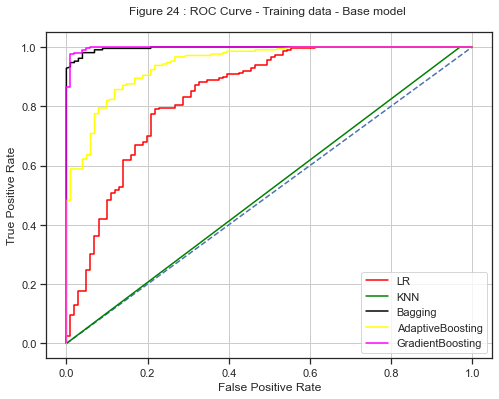

In [481]:
# ROC Curve of Training data - Base model

plt.figure(figsize = (8, 6))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(LR_model_1_train_fpr, LR_model_1_train_tpr, color = 'red', label = 'LR')
plt.plot(KNN_model_1_train_fpr, KNN_model_1_train_tpr, color = 'green', label = 'KNN')
plt.plot(bag_model_1_train_fpr, bag_model_1_train_tpr, color = 'black', label = 'Bagging')
plt.plot(adb_model_1_train_fpr, adb_model_1_train_tpr, color = 'yellow', label = 'AdaptiveBoosting')
plt.plot(gbc_model_1_train_fpr, gbc_model_1_train_tpr, color = 'magenta', label = 'GradientBoosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 24 : ROC Curve - Training data - Base model \n')
plt.grid()
plt.legend()
plt.show()

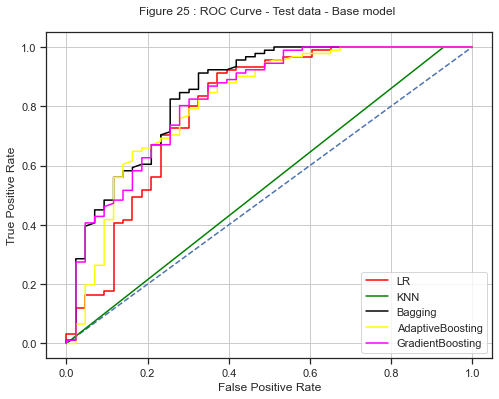

In [484]:
# ROC Curve of Test data - Base model

plt.figure(figsize = (8, 6))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(LR_model_1_test_fpr, LR_model_1_test_tpr, color = 'red', label = 'LR')
plt.plot(KNN_model_1_test_fpr, KNN_model_1_test_tpr, color = 'green', label = 'KNN')
plt.plot(bag_model_1_test_fpr, bag_model_1_test_tpr, color = 'black', label = 'Bagging')
plt.plot(adb_model_1_test_fpr, adb_model_1_test_tpr, color = 'yellow', label = 'AdaptiveBoosting')
plt.plot(gbc_model_1_test_fpr, gbc_model_1_test_tpr, color = 'magenta', label = 'GradientBoosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 25 : ROC Curve - Test data - Base model \n')
plt.grid()
plt.legend()
plt.show()

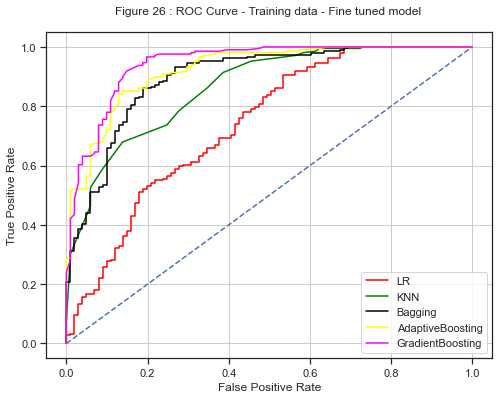

In [485]:
# ROC Curve of  Training data - Tuned

plt.figure(figsize = (8, 6))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(LR_model_6_train_fpr, LR_model_6_train_tpr, color = 'red', label = 'LR')
plt.plot(KNN_model_2_train_fpr, KNN_model_2_train_tpr, color = 'green', label = 'KNN')
plt.plot(bag_model_2_train_fpr, bag_model_2_train_tpr, color = 'black', label = 'Bagging')
plt.plot(adb_model_2_train_fpr, adb_model_2_train_tpr, color = 'yellow', label = 'AdaptiveBoosting')
plt.plot(gbc_model_2_train_fpr, gbc_model_2_train_tpr, color = 'magenta', label = 'GradientBoosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 26 : ROC Curve - Training data - Fine tuned model \n')
plt.grid()
plt.legend()
plt.show()

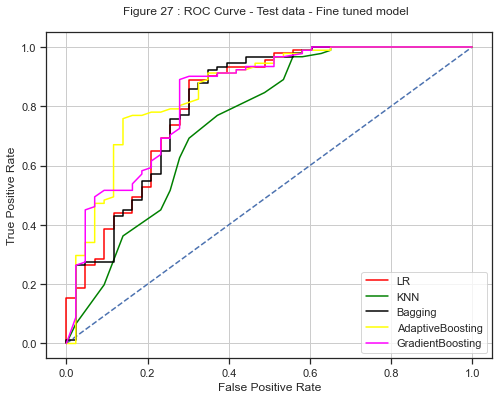

In [487]:
# ROC Curve of  Test data - Tuned

plt.figure(figsize = (8, 6))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(LR_model_6_test_fpr, LR_model_6_test_tpr, color = 'red', label = 'LR')
plt.plot(KNN_model_2_test_fpr, KNN_model_2_test_tpr, color = 'green', label = 'KNN')
plt.plot(bag_model_2_test_fpr, bag_model_2_test_tpr, color = 'black', label = 'Bagging')
plt.plot(adb_model_2_test_fpr, adb_model_2_test_tpr, color = 'yellow', label = 'AdaptiveBoosting')
plt.plot(gbc_model_2_test_fpr, gbc_model_2_test_tpr, color = 'magenta', label = 'GradientBoosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 27 : ROC Curve - Test data - Fine tuned model  \n')
plt.grid()
plt.legend()
plt.show()

In [501]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

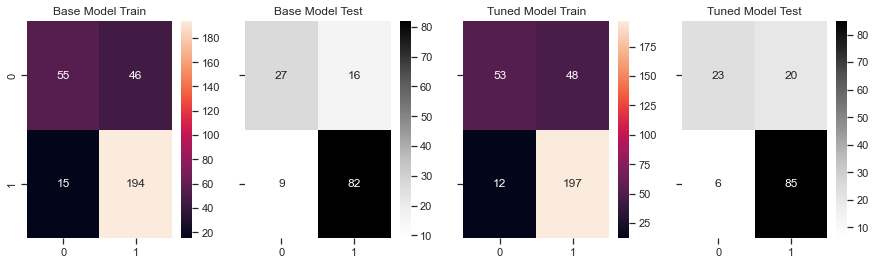

In [504]:
# Logistic Regression
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, LR_model_1_predict_train)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Base Model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, LR_model_1_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Base Model Test');

plot_2 = sns.heatmap((metrics.confusion_matrix(y_train, LR_model_6_predict_train)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Tuned Model Train');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_test, LR_model_6_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Tuned Model Test');

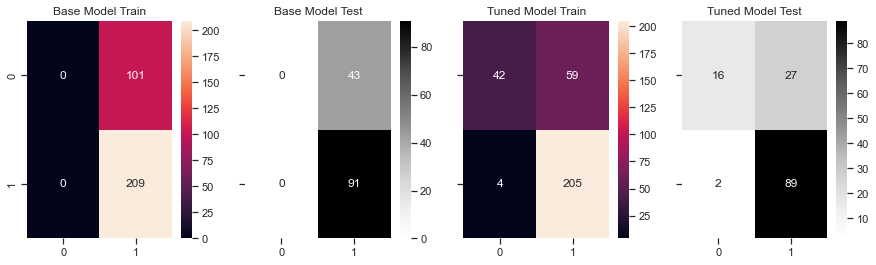

In [505]:
# K Nearest Neighbor
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, KNN_model_1_predict_train)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Base Model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, KNN_model_1_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Base Model Test');

plot_2 = sns.heatmap((metrics.confusion_matrix(y_train, KNN_model_2_predict_train)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Tuned Model Train');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_test, KNN_model_2_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Tuned Model Test');

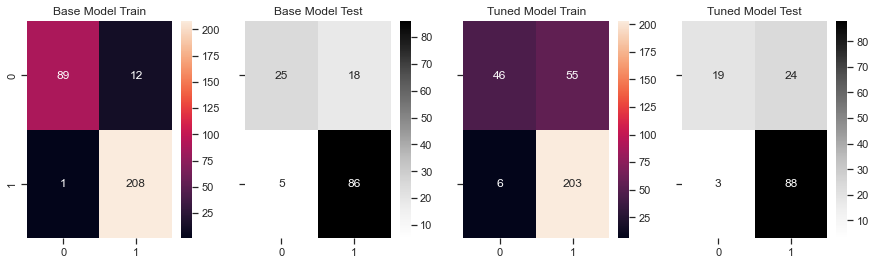

In [509]:
# Bagging classifier
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, bag_model_1_predict_train)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Base Model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, bag_model_1_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Base Model Test');

plot_2 = sns.heatmap((metrics.confusion_matrix(y_train, bag_model_2_predict_train)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Tuned Model Train');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_test, bag_model_2_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Tuned Model Test');

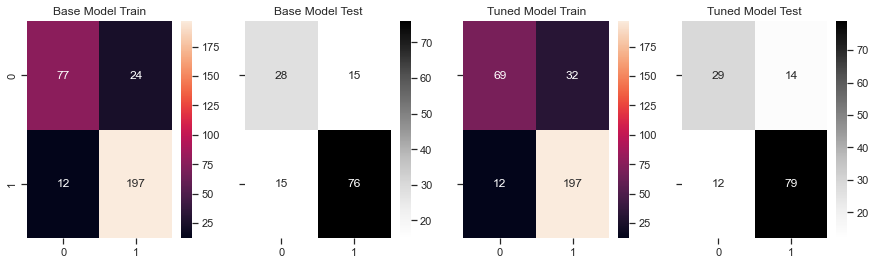

In [510]:
# Adaptive Boosting
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_ot, adb_model_1_predict_train)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Base Model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_ot, adb_model_1_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Base Model Test');

plot_2 = sns.heatmap((metrics.confusion_matrix(y_train_ot, adb_model_2_predict_train)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Tuned Model Train');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_test_ot, adb_model_2_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Tuned Model Test');

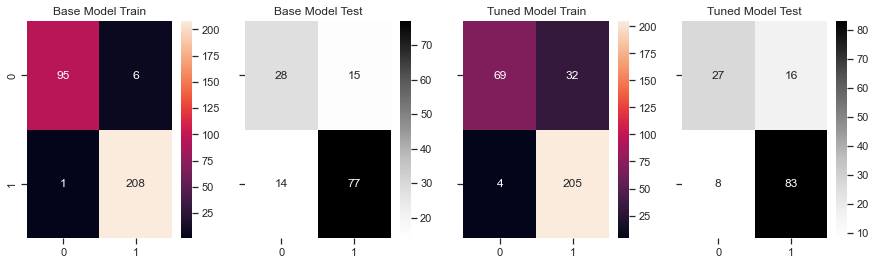

In [511]:
# Adaptive Boosting
f,a =  plt.subplots(1,4,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_ot, gbc_model_1_predict_train)),annot=True,fmt='.4g',ax=a[0][0]);
a[0][0].set_title('Base Model Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_ot, gbc_model_1_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Base Model Test');

plot_2 = sns.heatmap((metrics.confusion_matrix(y_train_ot, gbc_model_2_predict_train)),annot=True,fmt='.4g',ax=a[0][2]);
a[0][2].set_title('Tuned Model Train');

plot_3 = sns.heatmap((metrics.confusion_matrix(y_test_ot, gbc_model_2_predict_test)),annot=True,fmt='.4g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Tuned Model Test');

### Inference
1.Based on these predictions, what are the insights?